In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import bokeh
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)


In [114]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/pollution_us_2000_2016.csv"
df = pd.read_csv(csv_path)

state_csv_path = "Resources/State_2016.csv"
state_2016_df = pd.read_csv(state_csv_path)

In [364]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year'] = pd.DatetimeIndex(df['Date Local']).year
#df['month'] = pd.DatetimeIndex(df['Date Local']).month
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') 

In [365]:
# Delete extraneous column
df = df.drop(['Unnamed: 0','State Code','County Code','Address','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units'], axis=1)
# Removing Mexico
df = df[df.State!='Country Of Mexico']
df.head()

KeyError: "['Unnamed: 0' 'State Code' 'County Code' 'Address' 'Site Num' 'NO2 Units'\n 'O3 Units' 'SO2 Units' 'CO Units'] not found in axis"

In [122]:
df.State.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [123]:
df_grouped = df.groupby(['State','Date Local']).mean()
df_grouped.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
State   Date Local                                                            
Alabama 2013-12-01  17.208333               39.3              18.0     37.0   
        2013-12-02  20.687500               32.4               7.0     30.0   
        2013-12-03  14.912500               22.4              17.0     21.0   
        2013-12-04   7.825000               19.3              17.0     18.0   
        2013-12-05   8.004762               16.0               7.0     15.0   

                     O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.013542             0.026              9.0    24.0   
        2013-12-02  0.009375             0.013              0.0    12.0   
        2013-12-03  0.008167             0.012             22.0    11.0   
        2013-12-04  0.011125             0.014              8.0    13.0   
        2013-12-05  0.010083             0.014             18.0    13.0   

                    SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
State   Date Local                                                           
Alabama 2013-12-01  0.285390               0.75              11.0      1.0   
        2013-12-02  0.531666               2.10              11.0      3.0   
        2013-12-03  0.252632               1.35              12.5      3.0   
        2013-12-04  0.123052               0.95              17.0      1.0   
        2013-12-05 -0.014285               0.60               2.5      1.0   

                     CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.262879             0.650              8.5     6.0   
        2013-12-02  0.352812             0.485              8.0     6.0   
        2013-12-03  0.237575             0.325              4.0     3.0   
        2013-12-04  0.115152             0.220             18.5     2.0   
        2013-12-05  0.117575             0.200             17.5     2.0   

                      year  
State   Date Local          
Alabama 2013-12-01  2013.0  
        2013-12-02  2013.0  
        2013-12-03  2013.0  
        2013-12-04  2013.0  
        2013-12-05  2013.0

In [124]:
#NO2 data
NO2_data = df[["State","Date Local","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI","year"
                          ]]
NO2_data.head()

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,year
0,Arizona,2000-01-01,19.041667,49.0,19,46,2000
1,Arizona,2000-01-01,19.041667,49.0,19,46,2000
2,Arizona,2000-01-01,19.041667,49.0,19,46,2000
3,Arizona,2000-01-01,19.041667,49.0,19,46,2000
4,Arizona,2000-01-02,22.958333,36.0,19,34,2000


In [125]:
df_c = NO2_data.sort_values('State')
df_c = NO2_data.sort_values('NO2 Mean')
df_c.head()

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,year
1294684,Oklahoma,2012-05-29,-2.0,-2.0,0,0,2012
1294686,Oklahoma,2012-05-29,-2.0,-2.0,0,0,2012
1294687,Oklahoma,2012-05-29,-2.0,-2.0,0,0,2012
1294683,Oklahoma,2012-05-28,-2.0,-2.0,0,0,2012
1294682,Oklahoma,2012-05-28,-2.0,-2.0,0,0,2012


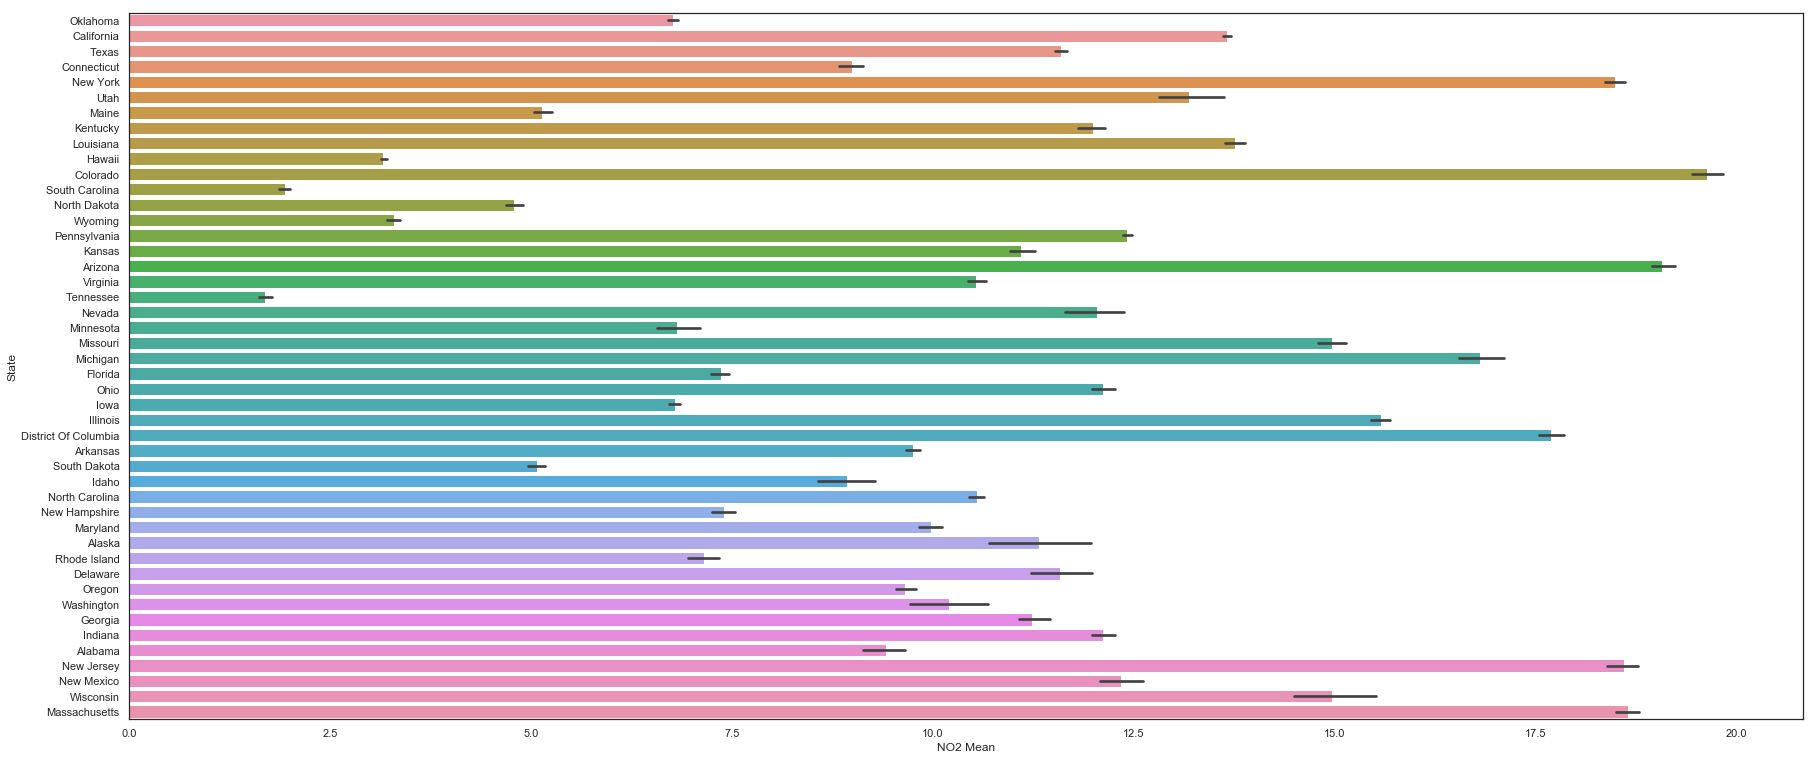

In [126]:
#Mean NO2 levels for each state
ax = sns.barplot(x="NO2 Mean",y="State", data=df_c, ci=100)
#ax = sns.sort_values(by='NO2 Mean',ascending=False)
fig = plt.gcf()
fig.set_size_inches(30, 13)


# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("NO2_Levels_For_Each_State.png", bbox_inches="tight")

In [48]:
#O3 data

O3_data = df[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"
                          ]]
O3_data.head()

,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
0,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
1,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
2,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
3,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
4,Arizona,Maricopa,Phoenix,0.013375,0.032,10,27


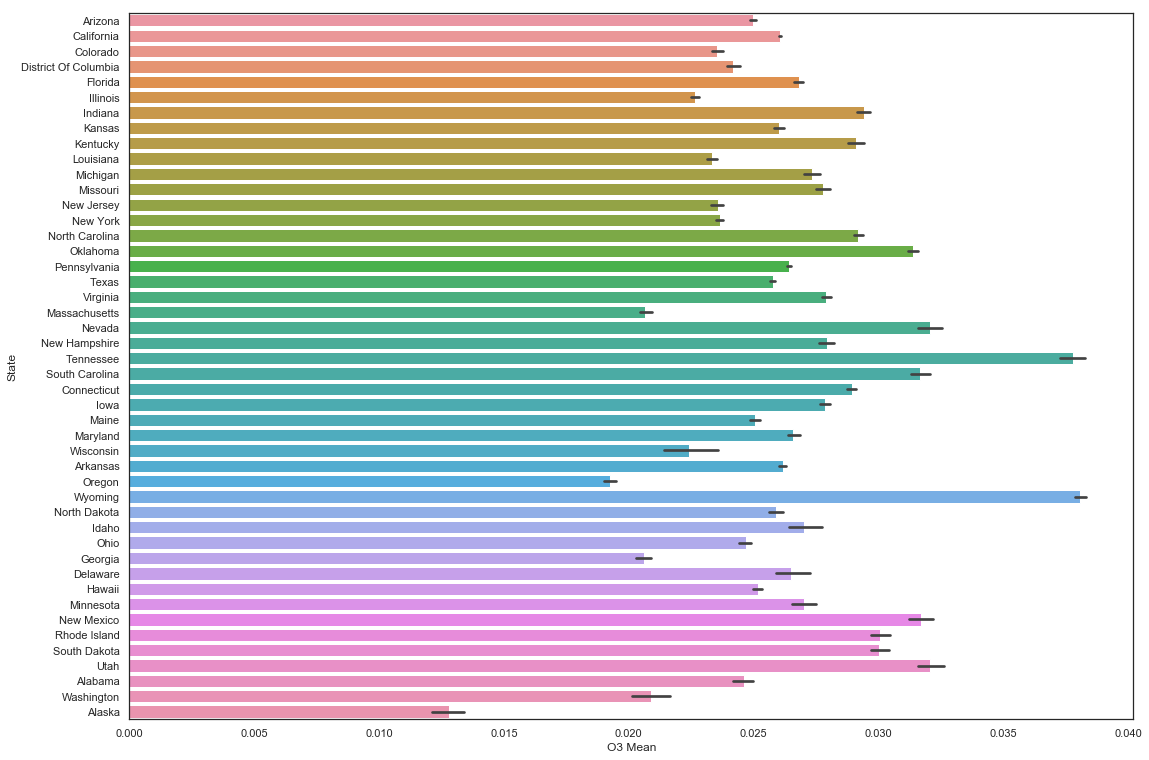

<Figure size 432x288 with 0 Axes>

In [50]:
#Mean O3 levels for each state
ax = sns.barplot(x="O3 Mean",y="State", data=O3_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)
plt.show()

plt.savefig("O3_Levels_For_Each_State.png", bbox_inches="tight")

In [51]:
#SO2 data
SO2_data = df[["State","County", "City","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI","Date Local","year"
                   ]]
SO2_data.head()

,State,County,City,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,2.975000,6.6,23,NaN,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,2.975000,6.6,23,NaN,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,1.958333,3.0,22,4.0,2000-01-02,2000


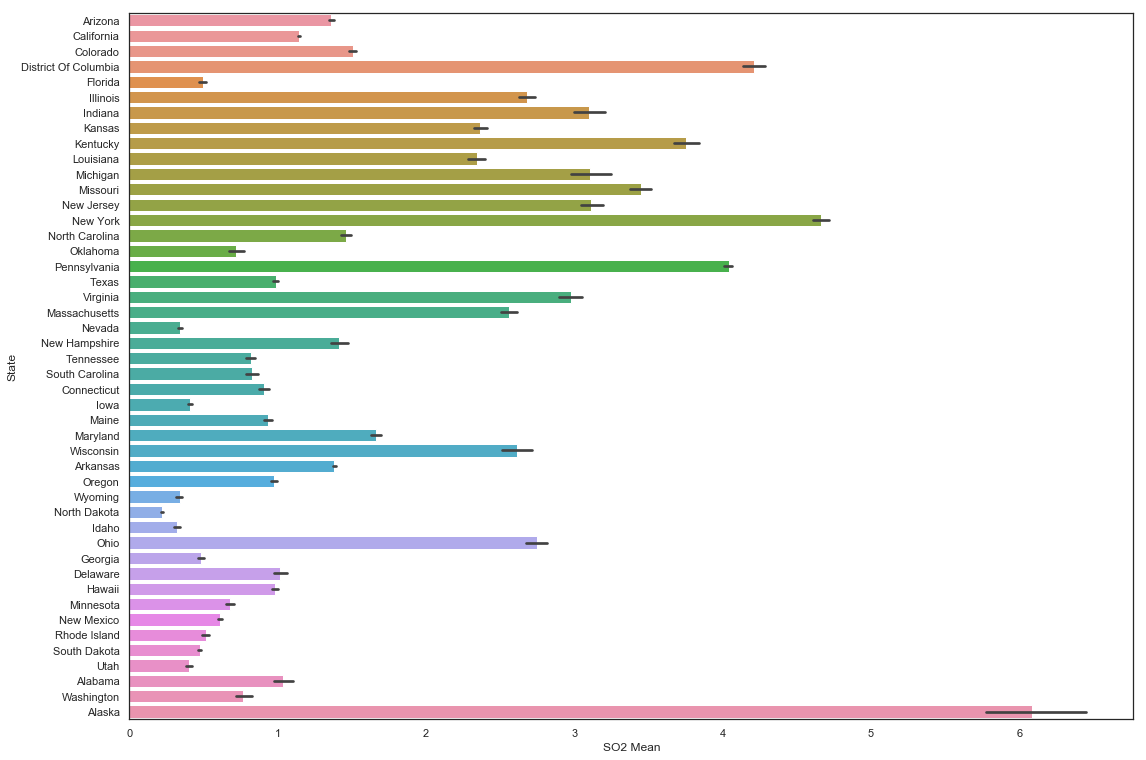

In [53]:
#Mean SO2 levels for each state
ax = sns.barplot(x="SO2 Mean",y="State", data=SO2_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)

plt.savefig("SO2_Levels_For_Each_State.png", bbox_inches="tight")

In [54]:
#CO data
CO_data = df[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
CO_data.head()


,State,County,City,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,1.145833,4.2,21,NaN,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,0.878947,2.2,23,25.0,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,1.145833,4.2,21,NaN,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,0.878947,2.2,23,25.0,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,0.850000,1.6,23,NaN,2000-01-02,2000


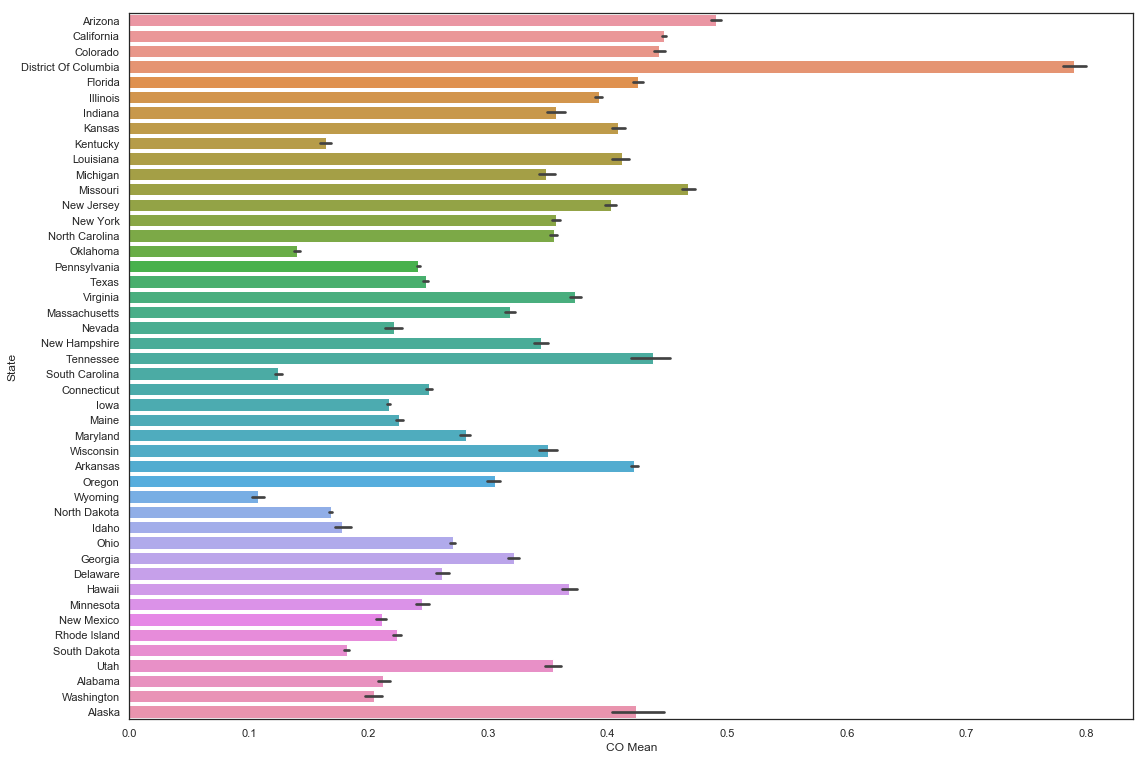

In [55]:
#Mean CO levels for each state
ax = sns.barplot(x="CO Mean",y="State", data=CO_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)

plt.savefig("CO_Levels_For_Each_State.png", bbox_inches="tight")

In [56]:
dff_group = df.groupby(["State"]).mean()

dff_group.head()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
State,,,,,,,,,,,,,,,,,
Alabama,9.410693,22.969098,13.158029,21.232246,0.024612,0.038434,9.293026,36.845170,1.034236,4.230198,10.756238,7.005115,0.212607,0.407386,9.446257,3.850288,2014.725528
Alaska,11.313152,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,6.083755,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340,2014.637285
Arizona,19.067975,38.398603,14.230985,36.106987,0.024989,0.043125,10.122022,39.004095,1.364213,2.728664,10.247938,4.213486,0.490616,0.982476,9.511755,9.191023,2007.698024
Arkansas,9.753701,23.094102,12.160195,21.486471,0.026169,0.038766,10.046983,35.035662,1.383302,2.272116,10.036115,2.975773,0.422393,0.558514,7.939375,5.929914,2011.673610
California,13.651894,25.592142,11.264417,24.110238,0.026053,0.038820,10.204474,35.722673,1.146695,2.331772,8.508692,3.598278,0.447485,0.769284,7.430949,7.405669,2007.483221


In [58]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [59]:
#drop unwanted columns
data = df.drop(['County','City',
                'NO2 1st Max Value','NO2 1st Max Hour',
                'O3 1st Max Value',
                'SO2 1st Max Value','SO2 1st Max Hour',
                'CO 1st Max Value','CO 1st Max Hour','year'], axis=1)
data.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,1.145833,NaN
3,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,10,27,1.958333,4.0,0.850000,NaN


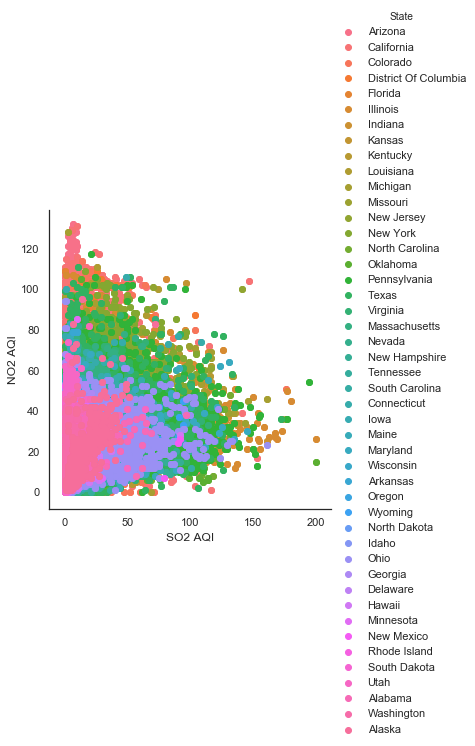

<Figure size 432x288 with 0 Axes>

In [387]:
#To create a seaborn plot using NO2 Mean and SO2 Mean Data
sns.FacetGrid(data, hue="State", height=5) \
   .map(plt.scatter, "SO2 AQI", "NO2 AQI") \
   .add_legend()
plt.show()

plt.title("By State - mean of the CO 1st Max Value")

#plt.savefig("By State - mean of the CO 1st Max Value.png" , bbox_inches="tight")
#plt.tight_layout()
#plt.show()

plt.savefig("SO2_Vs_NO2_byState.png", bbox_inches="tight")

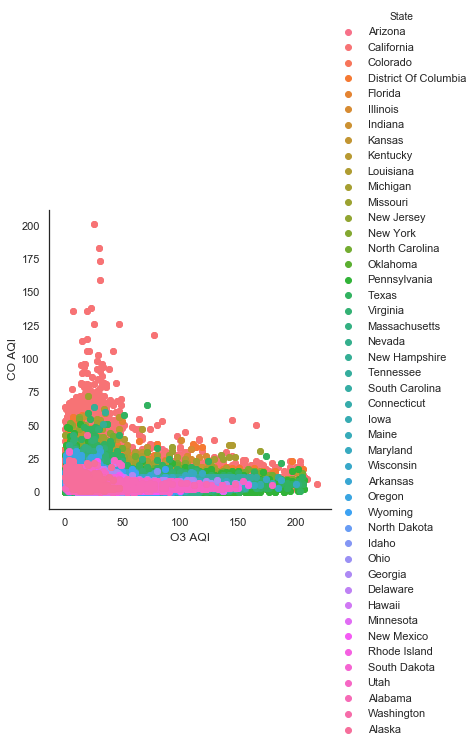

<Figure size 432x288 with 0 Axes>

In [388]:
#To create a seaborn plot using NO2 Mean and SO2 Mean Data
sns.FacetGrid(data, hue="State", height=5) \
   .map(plt.scatter, "O3 AQI", "CO AQI") \
   .add_legend()
plt.show()

plt.title("By State - mean of the CO 1st Max Value")

plt.savefig("O3_Vs_CO_byState.png", bbox_inches="tight")

In [150]:
Air_Onlydf = df[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

Air_Onlydf.head()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,46,34,13.0,NaN
1,46,34,13.0,25.0
2,46,34,NaN,NaN
3,46,34,NaN,25.0
4,34,27,4.0,NaN


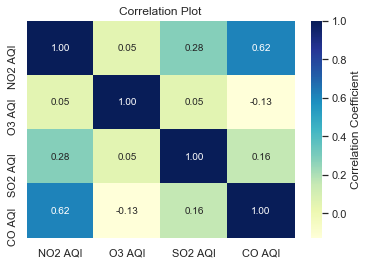

In [158]:
sns.heatmap(Air_Onlydf.corr(), annot= True ,  fmt = ".2f"  , cmap = "YlGnBu", cbar_kws= {'label' : 'Correlation Coefficient'})
plt.title("Correlation Plot")
plt.show()

Interpretation: 
CO AQI and NO2 AQI stand out with the highest positiive correlation out of the bunch.

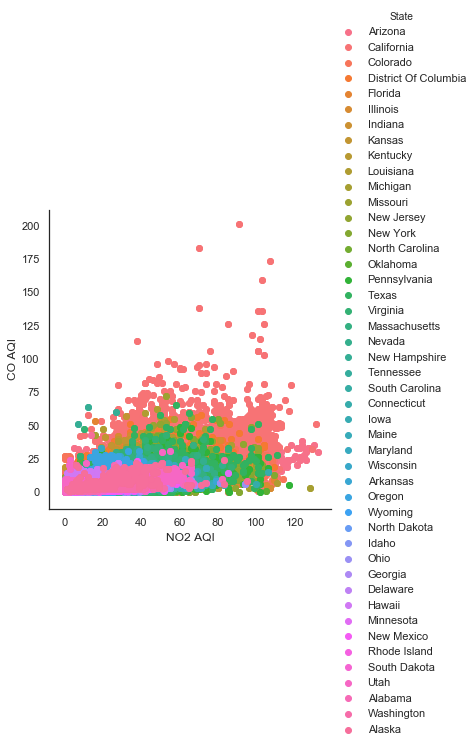

<Figure size 432x288 with 0 Axes>

In [389]:
#To create a seaborn plot using NO2 Mean and SO2 Mean Data
sns.FacetGrid(data, hue="State", height=5) \
   .map(plt.scatter, "NO2 AQI", "CO AQI") \
   .add_legend()
plt.show()

plt.title("By State - mean of the CO 1st Max Value")

plt.savefig("NO2_Vs_CO_byState.png", bbox_inches="tight")

In [162]:
df.City.unique()

array(['Phoenix', 'Scottsdale', 'Tucson', 'Concord', 'Bethel Island',
       'San Pablo', 'Pittsburg', 'Calexico', 'Bakersfield', 'Burbank',
       'Los Angeles', 'Long Beach', 'Hawthorne', 'Costa Mesa', 'Rubidoux',
       'Not in a city', 'Arden-Arcade', 'Victorville', 'Chula Vista',
       'San Diego', 'San Francisco', 'Capitan', 'Lompoc', 'Goleta',
       'Vandenberg Air Force Base', 'Davenport', 'Vallejo', 'Welby',
       'Washington', 'Winter Park', 'Chicago', 'Cicero',
       'Calumet City (PU RR name Calumet Park (sta.))',
       'Indianapolis (Remainder)', 'Kansas City', 'Ashland',
       'Lexington-Fayette (corporate name for Lexington)', 'Henderson',
       'Louisville', 'Paducah', 'Baton Rouge', 'Detroit', 'Sunset Hills',
       'Ladue', 'Ferguson', 'St. Ann', 'St. Louis', 'Camden', 'New York',
       'Holtsville', 'Winston-Salem', 'Charlotte', 'Park Hill',
       'Ponca City', 'Pittsburgh', 'Beaver Falls', 'Reading', 'Altoona',
       'Bristol', 'Johnstown', 'Scranton', 'La

In [192]:
# Only California Dataset
PNcal = data[df.State=="California"]
PNcal
# Temporary NA fix
#PNN= PN.dropna(axis='rows')
#PNN
# Missing Values
#miss = PN.isnull().sum().reset_index()
#miss.columns = ['Column','Missing Count']

# Time Frames of Interest
PNcal["Date of Year"] = data['Date Local'].dt.dayofyear # Day of Year
PNcal["Weekday"] = data['Date Local'].dt.weekday 

In [193]:
PNcal.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Date of Year,Weekday
3516,California,2000-01-01,14.782609,25,0.015542,13,25,0.636364,3.0,0.556522,NaN,1,5
3517,California,2000-01-01,14.782609,25,0.015542,13,25,0.636364,3.0,0.572222,9.0,1,5
3518,California,2000-01-01,14.782609,25,0.015542,13,25,0.600000,NaN,0.556522,NaN,1,5
3519,California,2000-01-01,14.782609,25,0.015542,13,25,0.600000,NaN,0.572222,9.0,1,5
3520,California,2000-01-02,16.043478,28,0.015292,9,27,1.000000,3.0,0.578261,NaN,2,6


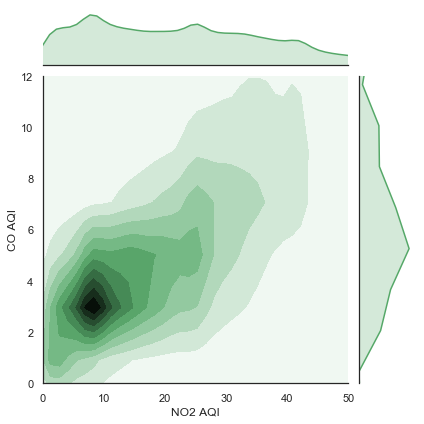

In [194]:
# Examine Strongest Correlation
sns.jointplot(x=PNcal["NO2 AQI"], y=PNcal["CO AQI"],  xlim=(0,50),ylim=(0,12) , kind='kde',color='g')

plt.title("By State - mean of the CO 1st Max Value")

plt.show()

Observation: 
As NO2 increases CO also increases 

In [187]:
# Only California Dataset
PN = data[df.State=="Pennsylvania"]
PN
# Temporary NA fix
#PNN= PN.dropna(axis='rows')
#PNN
# Missing Values
#miss = PN.isnull().sum().reset_index()
#miss.columns = ['Column','Missing Count']

# Time Frames of Interest
PN["Date of Year"] = data['Date Local'].dt.dayofyear # Day of Year
PN["Weekday"] = data['Date Local'].dt.weekday 

In [188]:
PNN.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,Date of Year,Weekday
69620,Pennsylvania,Allegheny,Pittsburgh,2000-03-31,32.875000,51.0,21,48,0.000000,0.000,...,33.0,7,47.0,0.000000,0.0,0,0.0,2000,91,4
69623,Pennsylvania,Allegheny,Pittsburgh,2000-04-06,13.956522,37.0,22,35,0.032625,0.049,...,20.0,7,29.0,0.220833,0.3,0,3.0,2000,97,3
69627,Pennsylvania,Allegheny,Pittsburgh,2000-04-07,32.958333,43.0,9,41,0.001792,0.005,...,70.0,14,94.0,0.616667,1.1,9,13.0,2000,98,4
69631,Pennsylvania,Allegheny,Pittsburgh,2000-04-08,19.125000,33.0,5,31,0.019708,0.034,...,19.0,1,27.0,0.354167,0.7,6,8.0,2000,99,5
69635,Pennsylvania,Allegheny,Pittsburgh,2000-04-09,11.625000,30.0,21,28,0.026375,0.037,...,13.0,15,19.0,0.091667,0.2,4,2.0,2000,100,6


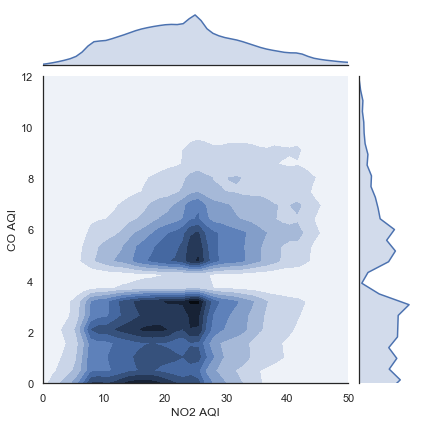

In [390]:
# Examine Strongest Correlation
sns.jointplot(x=PN["NO2 AQI"], y=PN["CO AQI"],  xlim=(0,50),ylim=(0,12) , kind='kde',color='b')

plt.title("By State - mean of the CO 1st Max Value")

plt.show()

In [199]:
p_data= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]
custom_df = df[['State','year','NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]]

custom_df.head()

,State,year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,2000,46,34,13.0,NaN
1,Arizona,2000,46,34,13.0,25.0
2,Arizona,2000,46,34,NaN,NaN
3,Arizona,2000,46,34,NaN,25.0
4,Arizona,2000,34,27,4.0,NaN


In [200]:
for col in p_data:
    custom_df[col] =(custom_df[col] - custom_df[col].mean())/custom_df[col].std(ddof=0)
    
custom_df = custom_df.melt(["State", "year"])#.stack()
custom_df.head()


,State,year,variable,value
0,Arizona,2000,NO2 AQI,1.468846
1,Arizona,2000,NO2 AQI,1.468846
2,Arizona,2000,NO2 AQI,1.468846
3,Arizona,2000,NO2 AQI,1.468846
4,Arizona,2000,NO2 AQI,0.674120


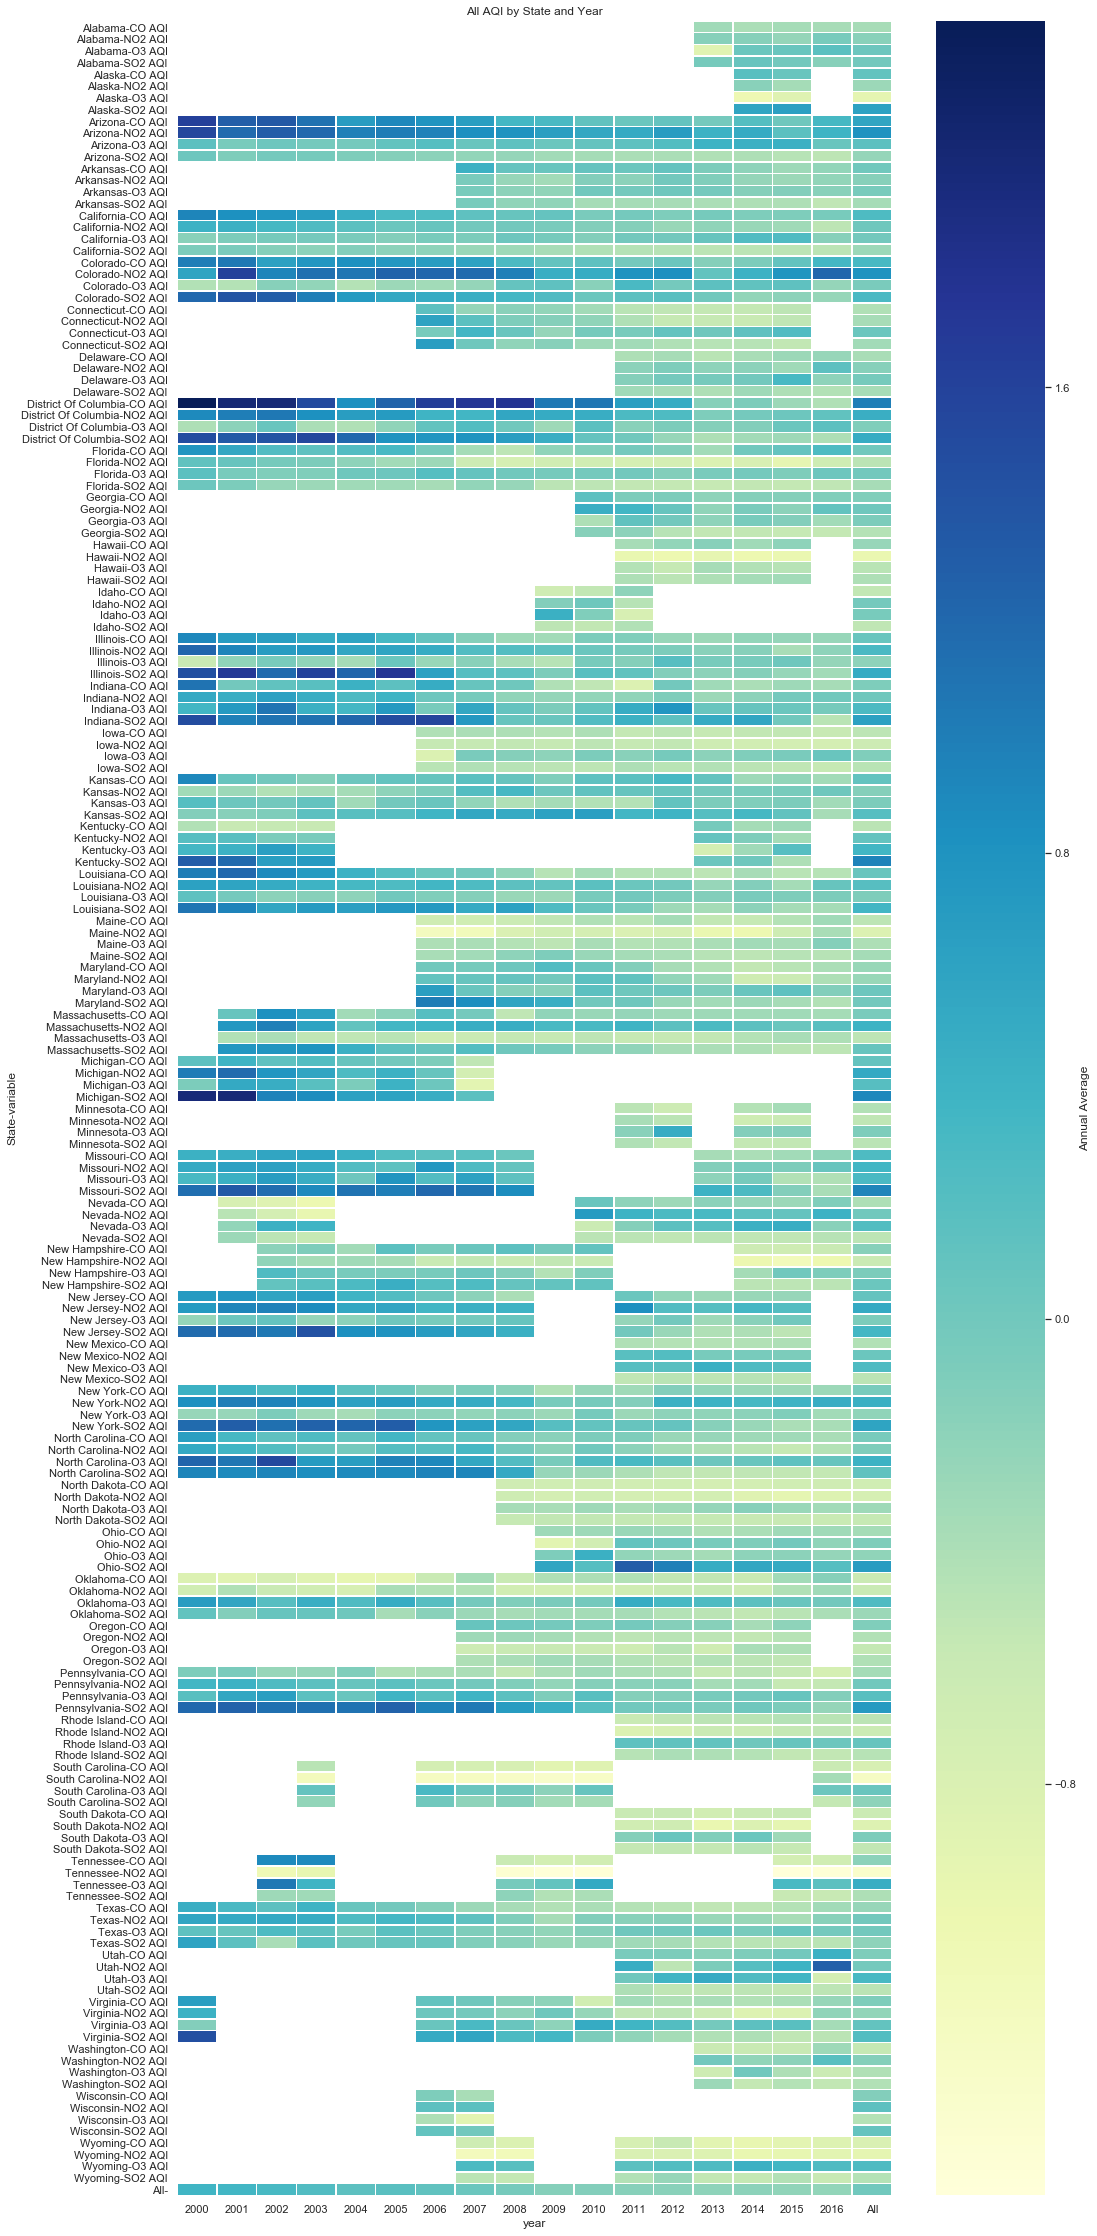

In [204]:

# Create Heatmap Pivot with State as Row, Year as Col, So2 as Value
p_data= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]


f, ax = plt.subplots(figsize=(16,40))
ax.set_title('All AQI by State and Year')
sns.heatmap(custom_df.pivot_table(values="value", index=["State", "variable"], columns=["year"], aggfunc='mean',margins=True),
                annot=False, linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'}, cmap="YlGnBu")
plt.show()

Interpretation: 
Lots of information here. Since so much data is being averaged, the overall trend suggests that pollution is getting better on a macro scale. However, many communities in the US still suffer from high exposure to pollution and dangerous industral toxins. Indeed, pollution spikes still exist and their health impacts are not well understood.

In [69]:
len(df.State.unique())

46

In [70]:
## Prepare all 4 AQIs against state and date 

df_State = df[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

df_State.head()



,State,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,2000-01-01,46,34,13.0,NaN
1,Arizona,2000-01-01,46,34,13.0,25.0
2,Arizona,2000-01-01,46,34,NaN,NaN
3,Arizona,2000-01-01,46,34,NaN,25.0
4,Arizona,2000-01-02,34,27,4.0,NaN


In [72]:
pollSt = df_State.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollSt.head()

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0

In [73]:
pollStGrouped = pollSt.groupby(level=0)
pollStGrouped

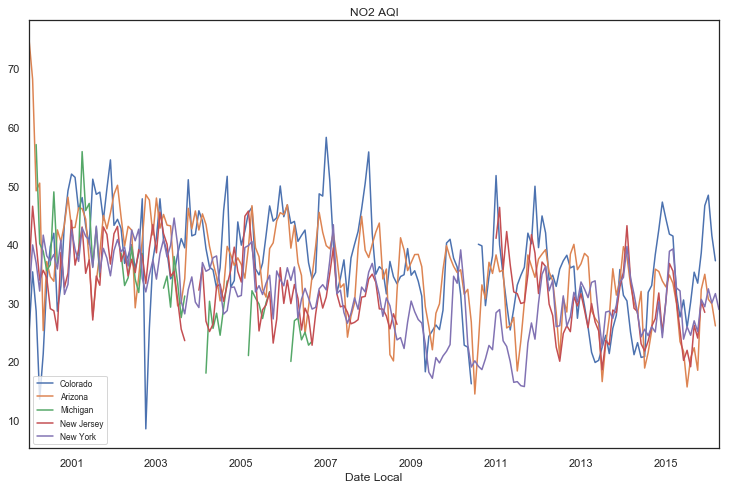

In [82]:
plt.figure(figsize=(20,13))

# NO2 AQI
plt.subplot(221)
pollNO2 = pollStGrouped['NO2 AQI']
pollNO2Top = pollNO2.mean().nlargest(5).index
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')

plt.savefig("NO2Trend_ByYears.png", bbox_inches="tight")

plt.tight_layout()
plt.show()



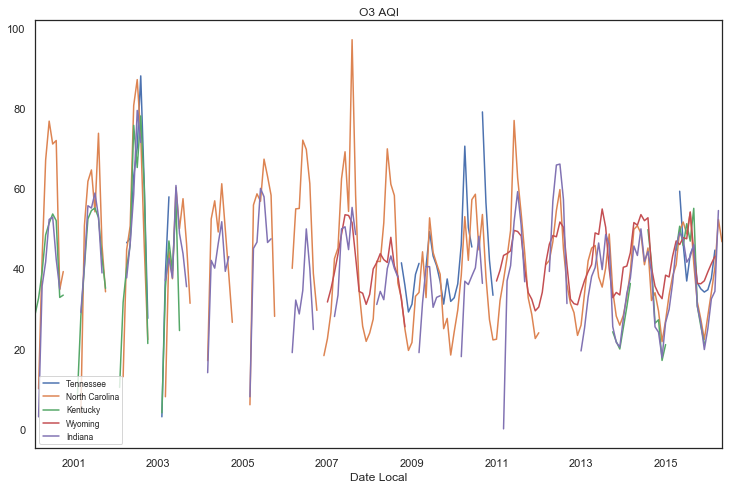

In [83]:
plt.figure(figsize=(20,13))

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(5).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

plt.savefig("O3Trend_ByYears.png" , bbox_inches="tight")

plt.tight_layout()
plt.show()



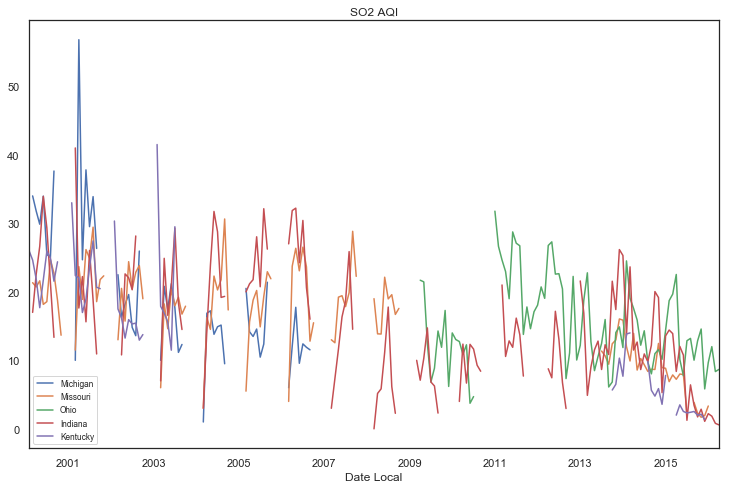

In [84]:
plt.figure(figsize=(20,13))

# SO2 AQI
plt.subplot(223)
pollSO2 = pollStGrouped['SO2 AQI']
pollSO2Top = pollSO2.mean().nlargest(5).index
for i in range(len(pollSO2Top)):
    pollSO2.get_group(pollSO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollSO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

plt.savefig("SO2Trend_ByYears.png" , bbox_inches="tight")

plt.tight_layout()
plt.show()


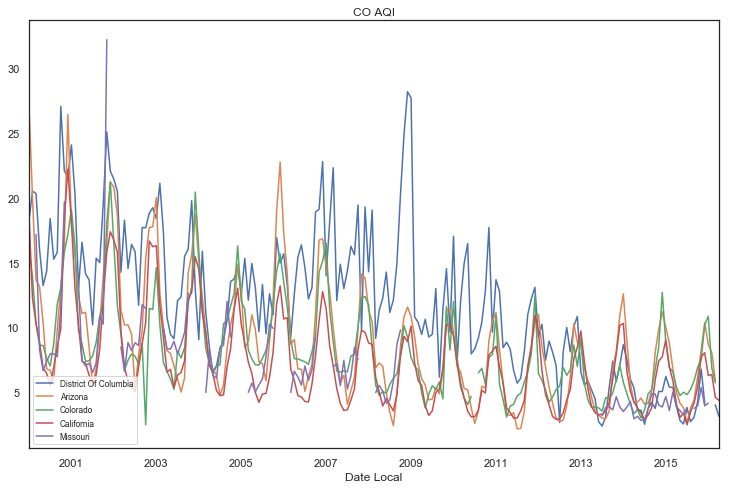

In [85]:
plt.figure(figsize=(20,13))

# CO AQI
plt.subplot(224)
pollCO = pollStGrouped['CO AQI']
pollCOTop = pollCO.mean().nlargest(5).index
for i in range(len(pollCOTop)):
    pollCO.get_group(pollCOTop[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollCOTop,loc=3,fontsize='small')
plt.title('CO AQI')

plt.tight_layout()
plt.show()

In [385]:
#To view the number of monitoring sites by state:
df["State"].value_counts()

California              576142
Pennsylvania            188892
Texas                   123208
New York                 70487
Arizona                  69840
Illinois                 50116
North Carolina           37126
Virginia                 36422
Arkansas                 35332
Colorado                 35188
Oklahoma                 34420
Kansas                   31480
Connecticut              29933
New Jersey               26732
Florida                  25918
Iowa                     25850
District Of Columbia     25696
Louisiana                23874
Maine                    23623
Maryland                 23538
Ohio                     22934
Massachusetts            21572
Hawaii                   20276
Missouri                 19778
Kentucky                 14686
Indiana                  13926
Wyoming                  13048
Oregon                   11794
North Dakota             11018
Nevada                    9698
New Hampshire             9294
Utah                      8668
South Da

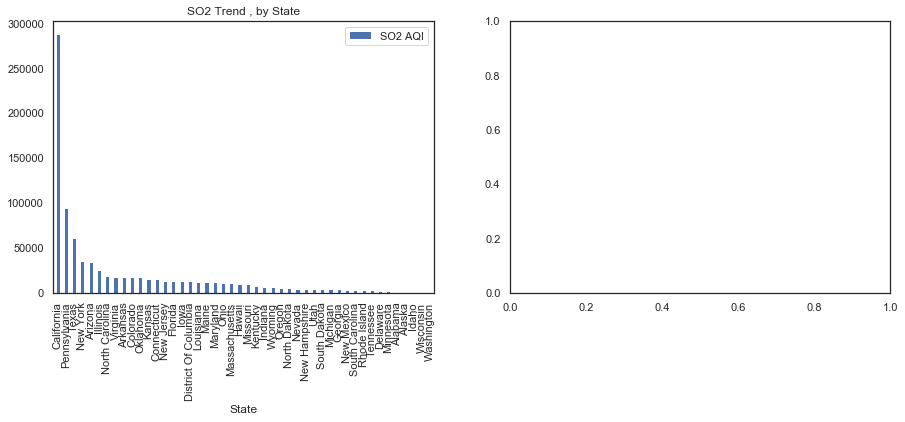

In [90]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['SO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='SO2 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("SO2 Trend , by State")

plt.savefig("SO2Trend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

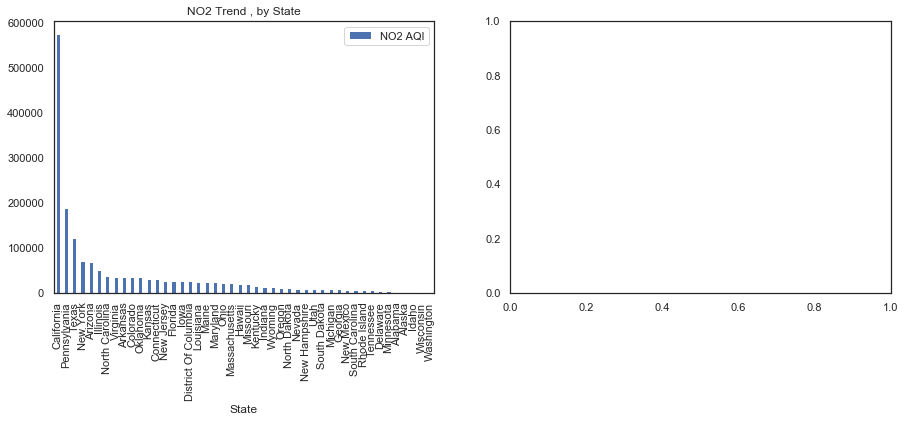

In [91]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['NO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='NO2 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("NO2 Trend , by State")

plt.savefig("NO2Trend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

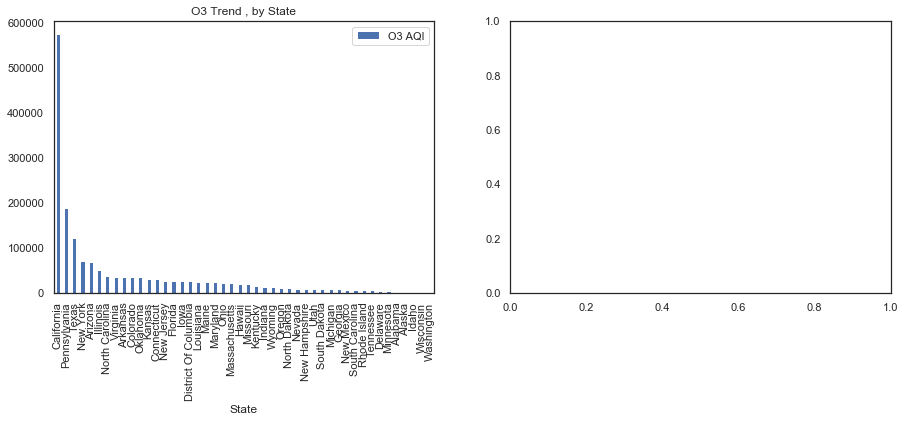

In [92]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['O3 AQI','State']].groupby(["State"]).count()\
.sort_values(by='O3 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("O3 Trend , by State")

plt.savefig("O3Trend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

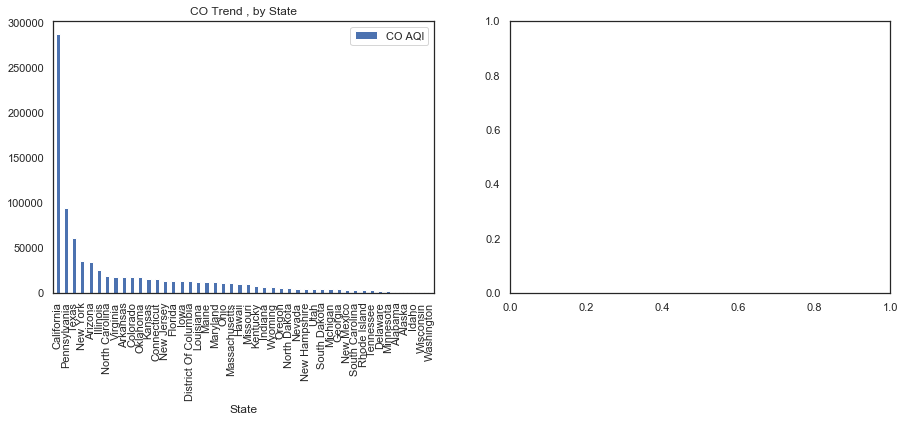

In [93]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['CO AQI','State']].groupby(["State"]).count()\
.sort_values(by='CO AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("CO Trend , by State")

plt.savefig("COTrend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all alia

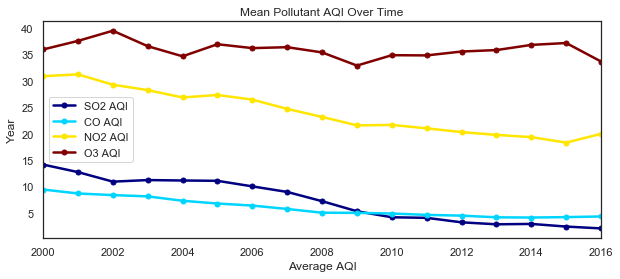

In [97]:
# Plot the aggregate decrease of all pollutants
f, ax = plt.subplots(figsize=[10,4])
df.groupby(['year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'})\
.plot(lw=2,colormap='jet',marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over Time')

plt.savefig("Mean Pollutant AQI Over Time.png" , bbox_inches="tight")


ax.set(xlabel="Average AQI", ylabel="Year")
plt.show()

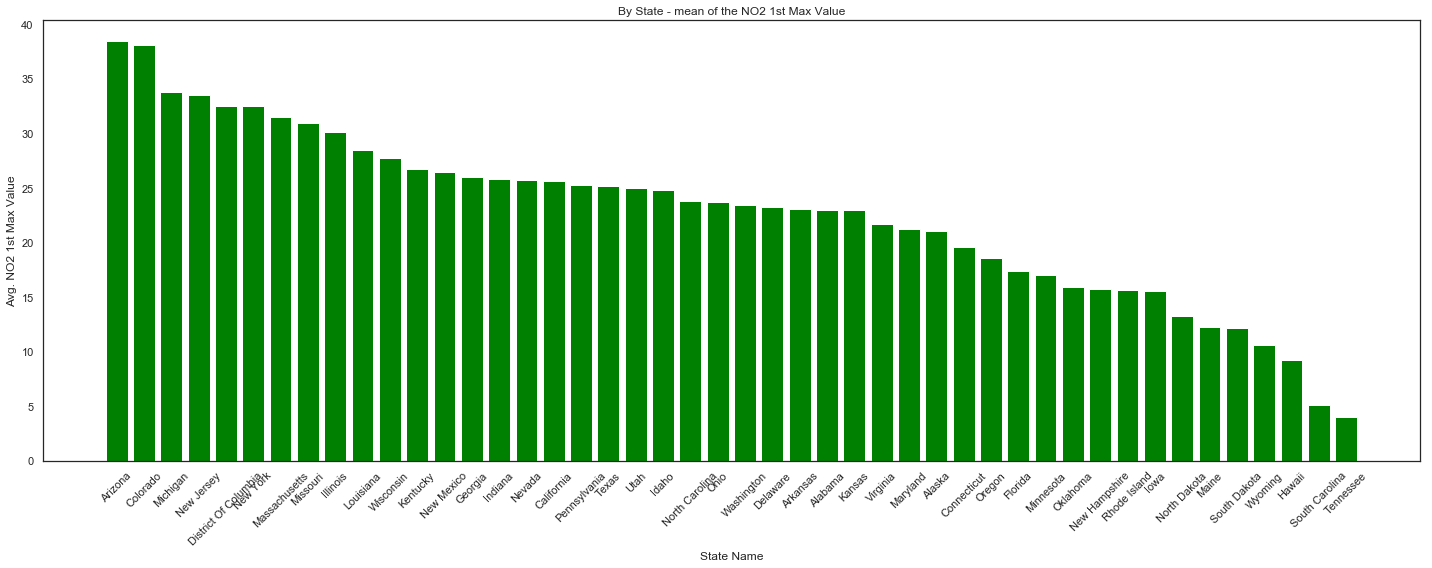

In [222]:
#NO2

states_no2_1st_val = df.groupby(["State"], as_index=False)["NO2 1st Max Value"].mean()
states_no2_1st_val = states_no2_1st_val.sort_values("NO2 1st Max Value", ascending=False)


plt.figure(figsize=(20,8))
plt.bar( states_no2_1st_val['State'], states_no2_1st_val['NO2 1st Max Value'], color='green')

plt.xlabel("State Name")
plt.ylabel("Avg. NO2 1st Max Value")
plt.title("By State - mean of the NO2 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)

plt.savefig("By State - mean of the NO2 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()


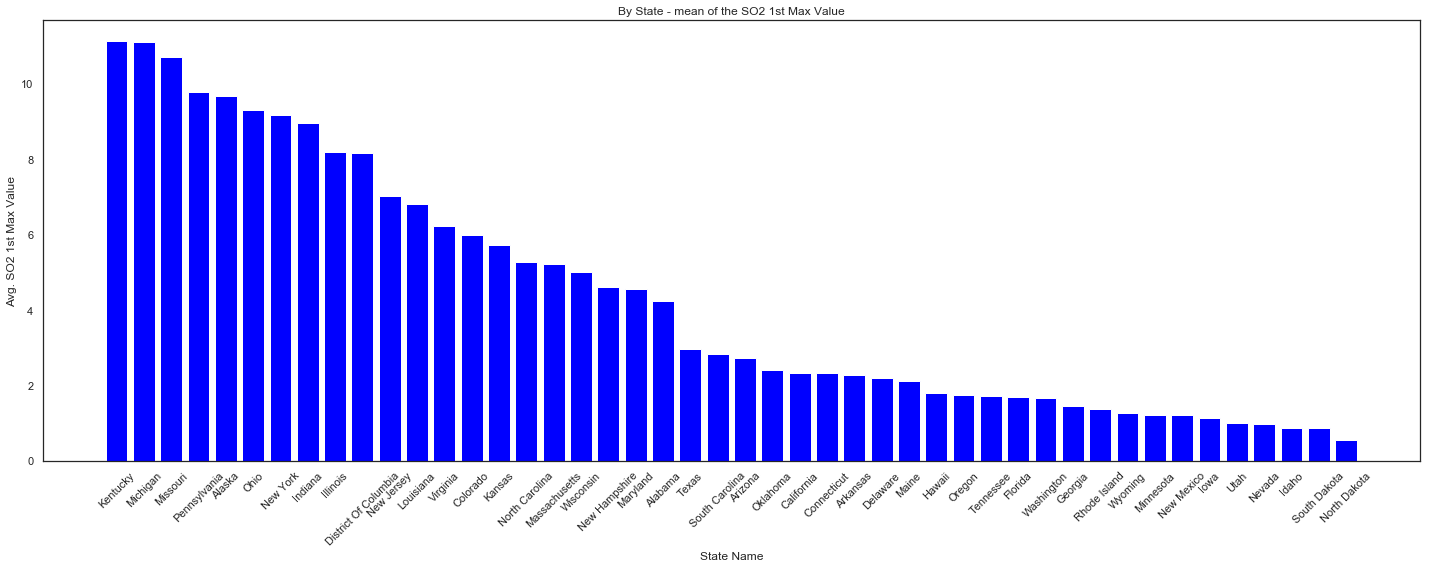

In [221]:
#SO2

states_so2_1st_val = df.groupby(["State"], as_index=False)["SO2 1st Max Value"].mean()
states_so2_1st_val = states_so2_1st_val.sort_values("SO2 1st Max Value", ascending=False)


plt.figure(figsize=(20,8))
plt.bar( states_so2_1st_val['State'], states_so2_1st_val['SO2 1st Max Value'], color='blue')

#/x = states_so2_1st_val.sort_values("SO2 1st Max Value", ascending=False)
#low_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=True)

plt.xlabel("State Name")
plt.ylabel("Avg. SO2 1st Max Value")
plt.title("By State - mean of the SO2 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)


plt.savefig("By State - mean of the SO2 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()





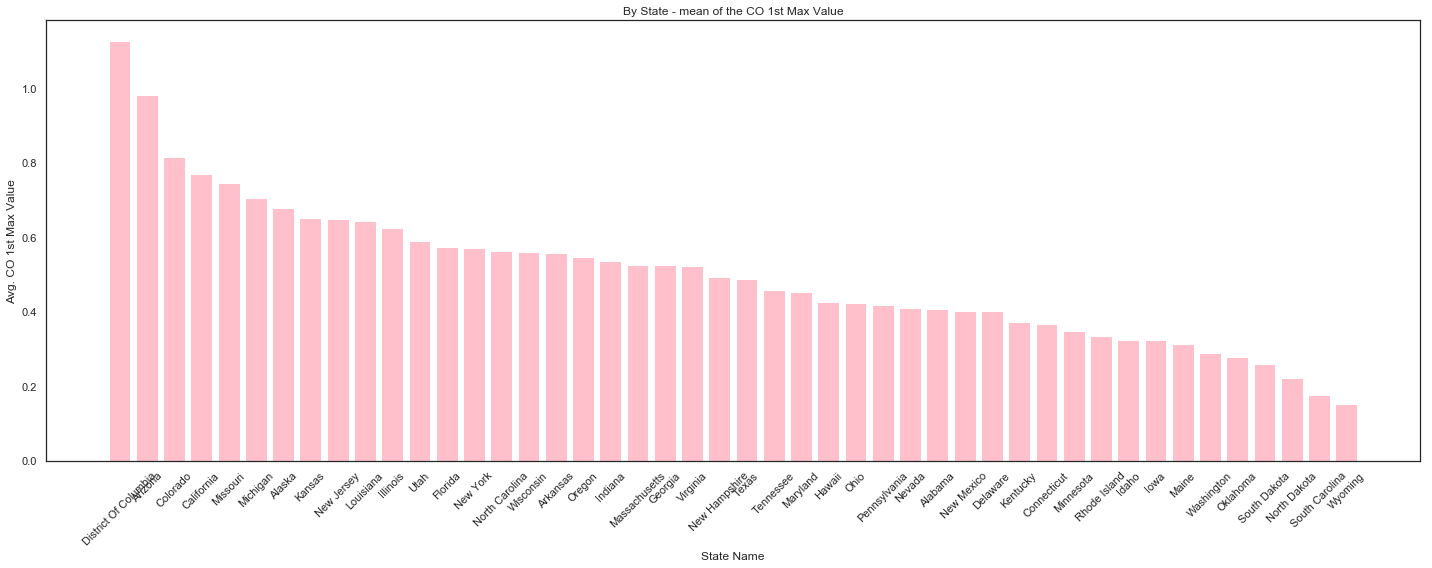

In [223]:
#CO

states_co_1st_val = df.groupby(["State"], as_index=False)["CO 1st Max Value"].mean()
states_co_1st_val = states_co_1st_val.sort_values("CO 1st Max Value", ascending=False)

plt.figure(figsize=(20,8))
plt.bar( states_co_1st_val['State'], states_co_1st_val['CO 1st Max Value'], color='pink')

plt.xlabel("State Name")
plt.ylabel("Avg. CO 1st Max Value")
plt.title("By State - mean of the CO 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)

plt.savefig("By State - mean of the CO 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()


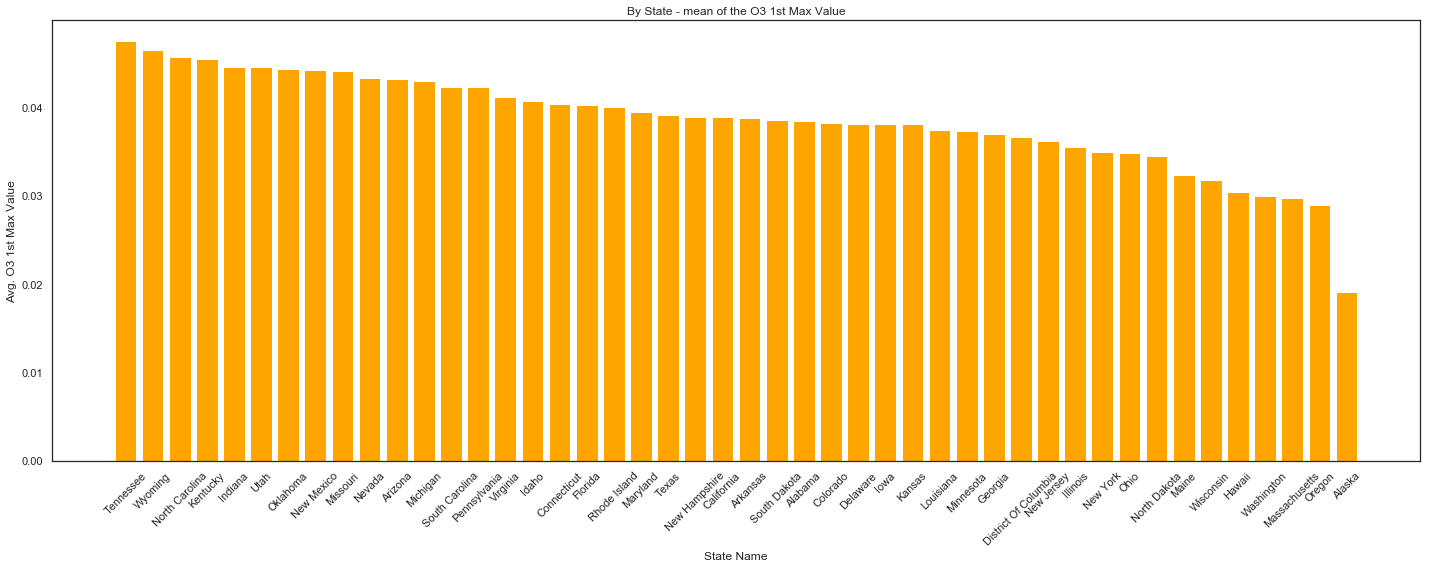

In [225]:
#O3

states_o3_1st_val = df.groupby(["State"], as_index=False)["O3 1st Max Value"].mean()
states_o3_1st_val = states_o3_1st_val.sort_values("O3 1st Max Value", ascending=False)

plt.figure(figsize=(20,8))
plt.bar( states_o3_1st_val['State'], states_o3_1st_val['O3 1st Max Value'], color='orange')

plt.xlabel("State Name")
plt.ylabel("Avg. O3 1st Max Value")
plt.title("By State - mean of the O3 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)

plt.savefig("By State - mean of the O3 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()




In [107]:
x =df['State']
x.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [113]:
df.dtypes

State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      float64
year                          int64
dtype: object

In [115]:
state_2016_df.head()

,State,Population,Area
0,.Alabama,4864745,50750
1,.Arizona,6945452,113642
2,.Arkansas,2990410,52075
3,.California,39209127,155973
4,.Colorado,5540921,103730


In [127]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [128]:
df_16 = df[df.year == 2016]

In [129]:
state_df = df_16.groupby(["State"])
state_16 = state_df[["State","NO2 AQI","O3 AQI", 'SO2 AQI', "CO AQI"
                          ]]

final_16 = state_16.mean()
final_16

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
State,,,,
Alabama,23.093960,39.295302,5.275168,3.906040
Arizona,29.652941,37.370588,1.117647,7.788235
Arkansas,20.274725,32.824176,0.824176,4.637363
California,16.164364,32.900000,1.172965,5.664727
Colorado,42.159851,31.286245,3.947955,7.843866
Delaware,25.988095,32.047619,1.952381,4.464286
District Of Columbia,25.689655,38.913793,2.206897,3.586207
Florida,13.857143,36.868132,0.813187,7.406593
Georgia,25.333333,29.634921,0.555556,5.253968


In [130]:
x = state_2016_df['Population']
y = state_2016_df['Area']
s = final_16['NO2 AQI']
y = y.astype(np.float)
x = x.astype(np.float)

xs = state_2016_df['Population']
ys = state_2016_df['Area']
ss = final_16['O3 AQI']
ys = y.astype(np.float)
xs = x.astype(np.float)

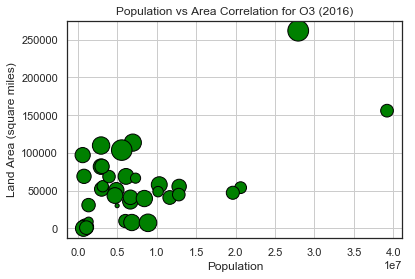

In [131]:
plt.scatter(x.values, 
            y.values, 
            s*10, c="green", 
            edgecolor="black", linewidths=1, marker="o")


plt.title("Population vs Area Correlation for O3 (2016)")
plt.ylabel("Land Area (square miles)")
plt.xlabel("Population")
plt.grid(True)

plt.savefig("Resources/O3_pop_vs_area.png")

#plt.text(10,30, "Note:\nState Population and Land Area does not direclty correlate with Air Quality")

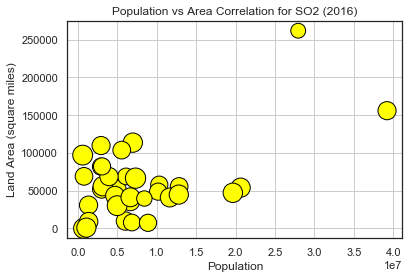

In [132]:
plt.scatter(xs.values, 
            ys.values, 
            ss*10, c="yellow", 
            edgecolor="black", linewidths=1, marker="o")


plt.title("Population vs Area Correlation for SO2 (2016)")
plt.ylabel("Land Area (square miles)")
plt.xlabel("Population")
plt.grid(True)

plt.savefig("Resources/SO2_pop_vs_area.png")

In [134]:
#CO data
CO_data = df[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
state_CO_data = CO_data.groupby(['State']).mean()
state_CO_data

,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
State,,,,,
Alabama,0.212607,0.407386,9.446257,3.850288,2014.725528
Alaska,0.423438,0.677599,10.138804,6.528340,2014.637285
Arizona,0.490616,0.982476,9.511755,9.191023,2007.698024
Arkansas,0.422393,0.558514,7.939375,5.929914,2011.673610
California,0.447485,0.769284,7.430949,7.405669,2007.483221
Colorado,0.443112,0.814280,8.691912,7.724205,2009.411504
Connecticut,0.250866,0.366647,8.229045,3.586407,2011.298400
Delaware,0.261600,0.401025,8.929477,3.839384,2012.819284
District Of Columbia,0.790170,1.125385,9.308608,11.605105,2008.048490


In [136]:
state_co_group = state_CO_data.loc[:,["CO AQI"]]

state_CO_high = state_co_group.sort_values('CO AQI', ascending=False)
state_CO_low = state_co_group.sort_values('CO AQI', ascending=True)


co_high = state_CO_high.head(5)
co_low = state_CO_low.head(5)



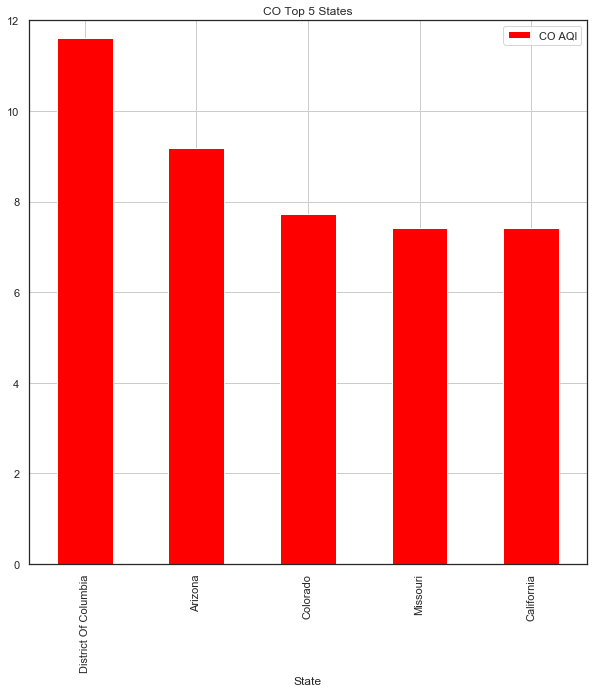

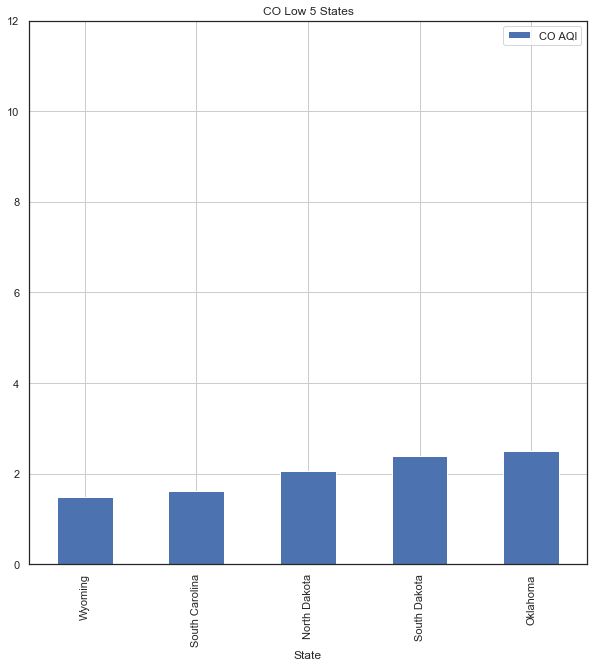

In [139]:
co_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="CO Top 5 States", color='red', ylim=(0, 12))
co_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="CO Low 5 States", ylim=(0, 12))
#plt.savefig("Resources/CO_state_5.png")


plt.show()

In [140]:
state_so2_data = SO2_data.groupby(['State']).mean()

state_so2_group = state_so2_data.loc[:,["SO2 AQI"]]

top_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=False)
low_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=True)

so2_high = top_state_so2.head(5)
so2_low = low_state_so2.head(5)

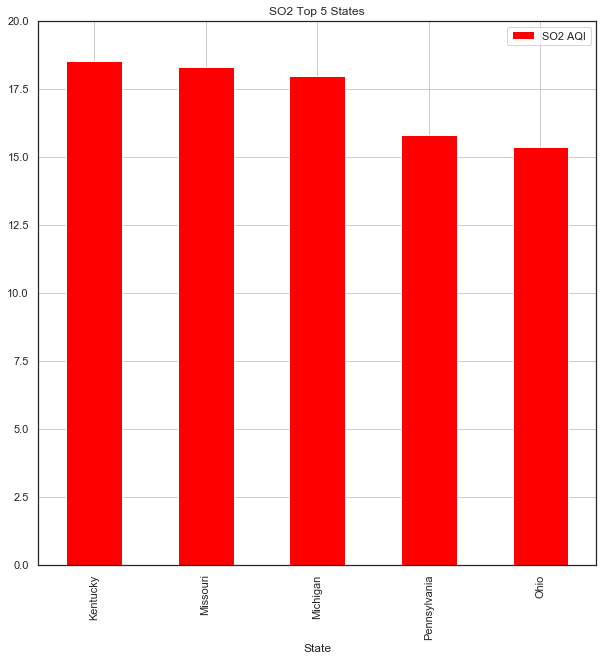

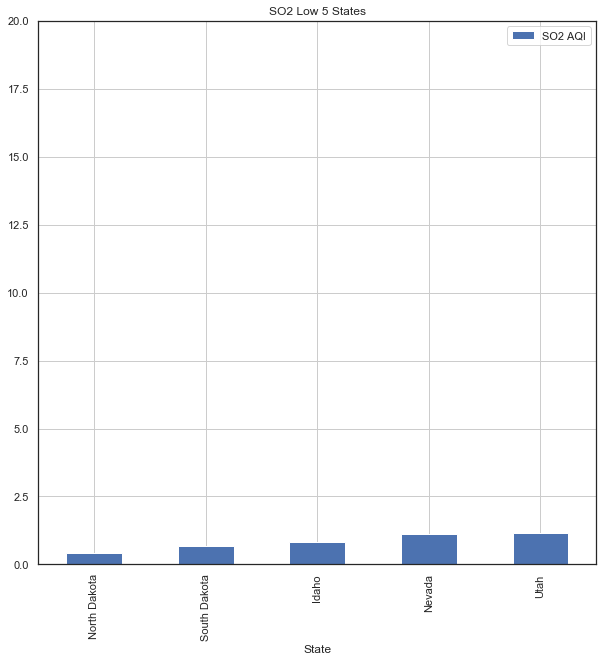

In [142]:
so2_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="SO2 Top 5 States", color='red', ylim=(0, 20))
so2_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="SO2 Low 5 States", ylim=(0, 20))

plt.show()

#plt.savefig("Resources/SO2_state_5.png")

In [144]:
state_o3_data = O3_data.groupby(['State']).mean()

state_o3_group = state_o3_data.loc[:,["O3 AQI"]]

top_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=False)
low_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=True)

o3_high = top_state_o3.head(5)
o3_low = low_state_o3.head(5)


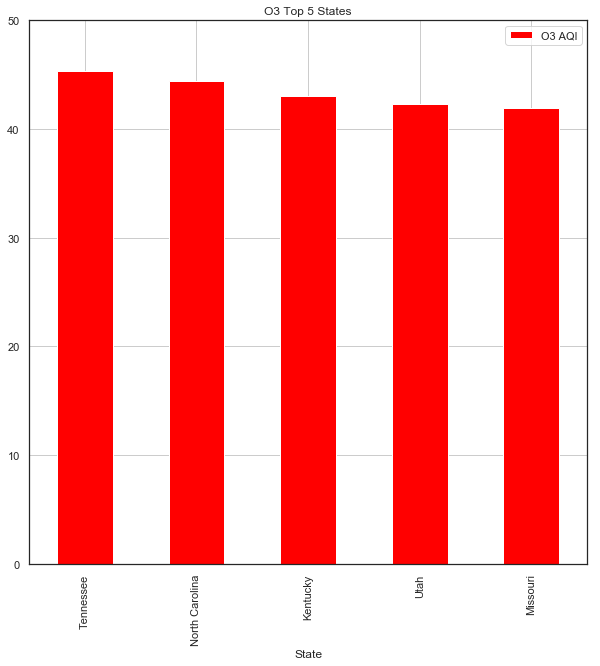

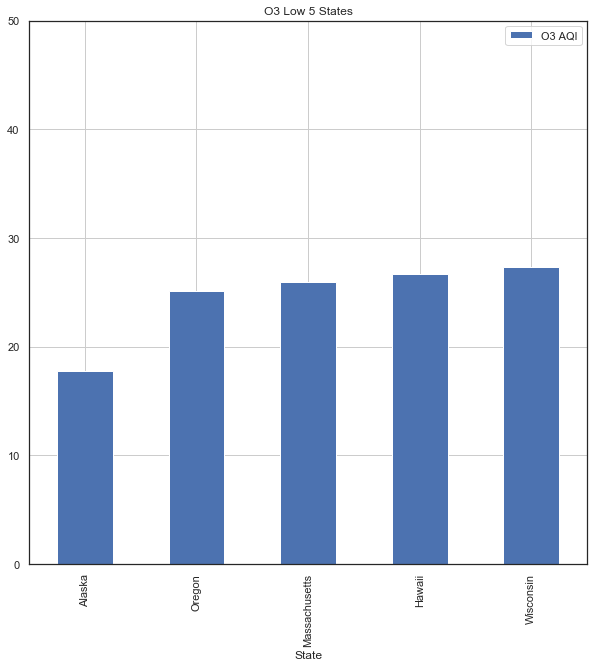

In [146]:
#plt.subplots(1,2, figsize=[15,5])

o3_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="O3 Top 5 States", color='red', ylim=(0, 50))
o3_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="O3 Low 5 States", ylim=(0, 50))

#plt.savefig("Resources/O3_state_5.png")

plt.show()



In [147]:
state_no2_data = NO2_data.groupby(['State']).mean()

state_no2_group = state_no2_data.loc[:,["NO2 AQI"]]

top_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=False)
low_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=True)

no2_high = top_state_no2.head(5)
no2_low = low_state_no2.head(5)


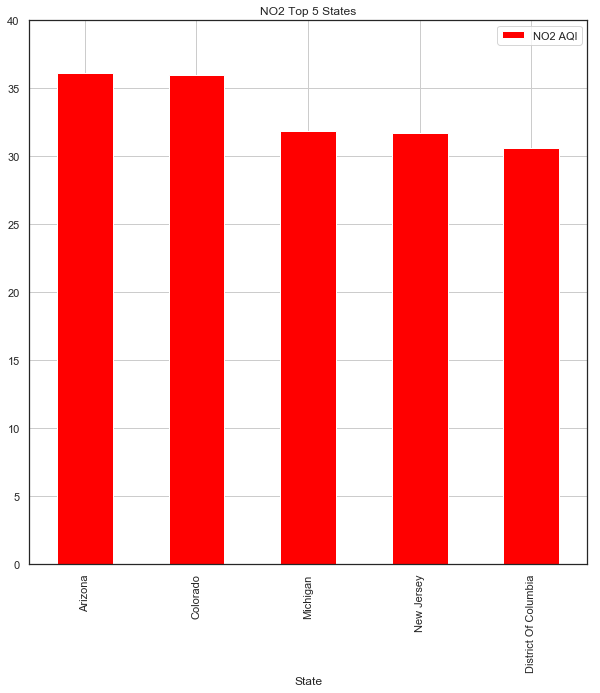

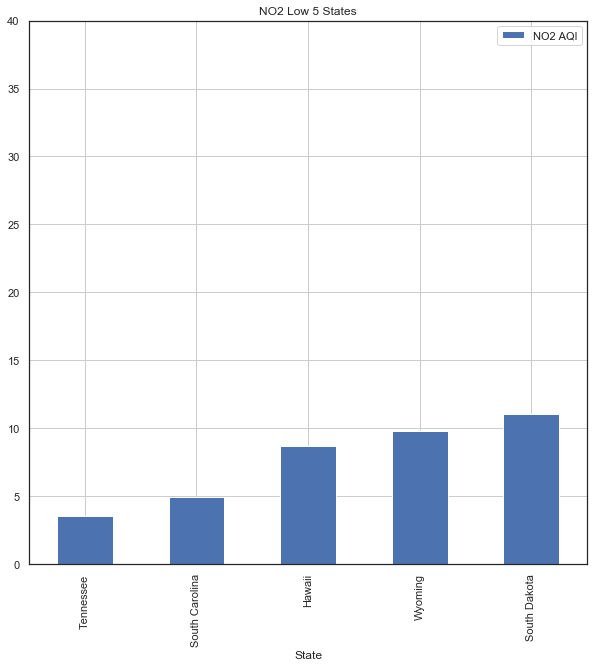

In [149]:
no2_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="NO2 Top 5 States", color='red', ylim=(0, 40))
no2_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="NO2 Low 5 States", ylim=(0, 40))

#plt.savefig("Resources/NO2_state_5.png")

plt.show()

In [226]:
data.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,1.145833,NaN
3,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,10,27,1.958333,4.0,0.850000,NaN


In [227]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [262]:
# Only California Dataset
PN = data[df.State=="Pennsylvania"]
PN.head()


,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
69620,Pennsylvania,2000-03-31,32.875000,48,0.000000,22,0,12.041667,47.0,0.000000,0.0
69621,Pennsylvania,2000-03-31,32.875000,48,0.000000,22,0,12.012500,NaN,0.000000,0.0
69622,Pennsylvania,2000-04-06,13.956522,35,0.032625,11,42,8.875000,29.0,0.220833,NaN
69623,Pennsylvania,2000-04-06,13.956522,35,0.032625,11,42,8.875000,29.0,0.220833,3.0
69624,Pennsylvania,2000-04-06,13.956522,35,0.032625,11,42,8.837500,NaN,0.220833,NaN


In [263]:
datanewNO2.head()

,State,Date Local,City,NO2 AQI,year,Date of Year,Weekday
0,Arizona,2000-01-01,Phoenix,46,2000,1,5
1,Arizona,2000-01-01,Phoenix,46,2000,1,5
2,Arizona,2000-01-01,Phoenix,46,2000,1,5
3,Arizona,2000-01-01,Phoenix,46,2000,1,5
4,Arizona,2000-01-02,Phoenix,34,2000,2,6


In [265]:
PNx = datanewNO2[datanewNO2.State=="California"]
PNx.head()


,State,Date Local,City,NO2 AQI,year,Date of Year,Weekday
3516,California,2000-01-01,Concord,25,2000,1,5
3517,California,2000-01-01,Concord,25,2000,1,5
3518,California,2000-01-01,Concord,25,2000,1,5
3519,California,2000-01-01,Concord,25,2000,1,5
3520,California,2000-01-02,Concord,28,2000,2,6


In [239]:
# Time Frames of Interest
datanewNO2["Date of Year"] = datanewNO2['Date Local'].dt.dayofyear # Day of Year
datanewNO2["Weekday"] = datanewNO2['Date Local'].dt.weekday 
datanewNO2.head()

,State,Date Local,City,NO2 AQI,year,Date of Year,Weekday
0,Arizona,2000-01-01,Phoenix,46,2000,1,5
1,Arizona,2000-01-01,Phoenix,46,2000,1,5
2,Arizona,2000-01-01,Phoenix,46,2000,1,5
3,Arizona,2000-01-01,Phoenix,46,2000,1,5
4,Arizona,2000-01-02,Phoenix,34,2000,2,6


In [266]:
PollnewNO2 = PNx.groupby(['State','City']).mean()  # Take mean values if there are depulicated entries
PollnewNO2.head()

NO2 AQI         year  Date of Year   Weekday
State      City                                                         
California Arden-Arcade   20.502566  2007.946071    184.985813  2.988932
           Bakersfield    51.903226  2000.737327    116.672811  2.921659
           Benicia        13.754687  2007.570312    202.403125  2.998438
           Berkeley       22.680717  2008.958744    187.312108  2.994619
           Bethel Island  13.072320  2007.607454    181.123782  2.995897

In [267]:
pollStGroupedN = PollnewNO2.groupby(level=0)
pollStGroupedN

In [277]:
data.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,1.145833,NaN
3,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,10,27,1.958333,4.0,0.850000,NaN


In [290]:
datanewNO2.head()

,State,Date Local,City,NO2 AQI,year,Date of Year,Weekday
0,Arizona,2000-01-01,Phoenix,46,2000,1,5
1,Arizona,2000-01-01,Phoenix,46,2000,1,5
2,Arizona,2000-01-01,Phoenix,46,2000,1,5
3,Arizona,2000-01-01,Phoenix,46,2000,1,5
4,Arizona,2000-01-02,Phoenix,34,2000,2,6


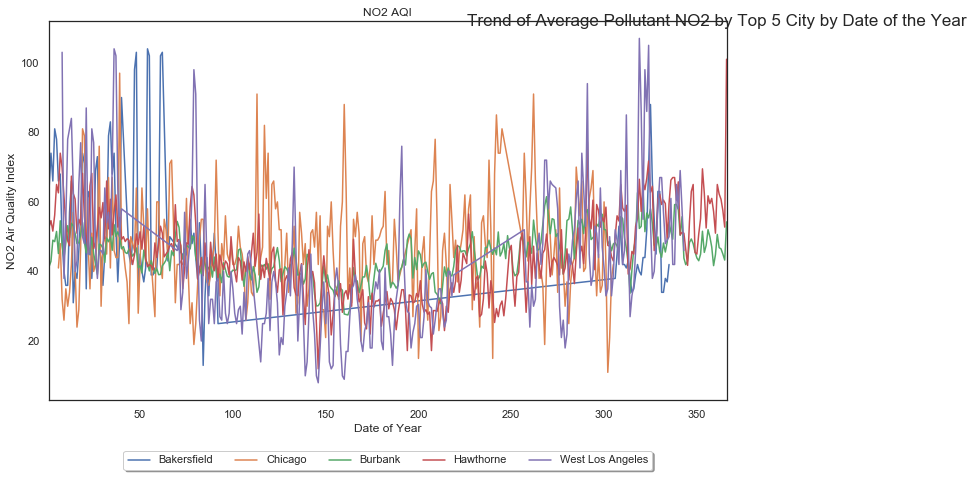

In [352]:
# Cities and NO2 data
city_dataNO2 = datanewNO2[["City", "Date of Year","NO2 AQI"]]\
    .groupby(['City', 'Date of Year']).mean().groupby(level="City")

plt.figure(figsize=(20,12))
for air1,plot in [('NO2 AQI',221)]:
        plt.subplot(plot)
        city_dataNO2_plot = city_dataNO2[air1]
        city_dataNO2_plotTop = city_dataNO2_plot.mean().nlargest(5).index
        for i in city_dataNO2_plotTop:
            plot1= city_dataNO2_plot.get_group(i).groupby(pd.Grouper(level='Date of Year'))\
            .mean().plot()
        plt.title(air1)
        plt.xlabel('Date of Year')
        plt.ylabel("NO2 Air Quality Index")
        plt.legend(city_dataNO2_plotTop, loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
#plt.subplots_adjust()
plt.suptitle("Trend of Average Pollutant NO2 by Top 5 City by Date of the Year",fontsize=17)
#plt.savefig('Trend of Average Pollutant by Top 5 City.png')
plt.show()



In [327]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [337]:

customx_df = df[['State','Date Local','City','year','NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]]
customx_df.head()


,State,Date Local,City,year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,2000-01-01,Phoenix,2000,46,34,13.0,NaN
1,Arizona,2000-01-01,Phoenix,2000,46,34,13.0,25.0
2,Arizona,2000-01-01,Phoenix,2000,46,34,NaN,NaN
3,Arizona,2000-01-01,Phoenix,2000,46,34,NaN,25.0
4,Arizona,2000-01-02,Phoenix,2000,34,27,4.0,NaN


In [338]:

# Time Frames of Interest
customx_df["Date of Year"] = customx_df['Date Local'].dt.dayofyear # Day of Year
customx_df["Weekday"] = customx_df['Date Local'].dt.weekday 


In [339]:
customx_df.head()

,State,Date Local,City,year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Date of Year,Weekday
0,Arizona,2000-01-01,Phoenix,2000,46,34,13.0,NaN,1,5
1,Arizona,2000-01-01,Phoenix,2000,46,34,13.0,25.0,1,5
2,Arizona,2000-01-01,Phoenix,2000,46,34,NaN,NaN,1,5
3,Arizona,2000-01-01,Phoenix,2000,46,34,NaN,25.0,1,5
4,Arizona,2000-01-02,Phoenix,2000,34,27,4.0,NaN,2,6


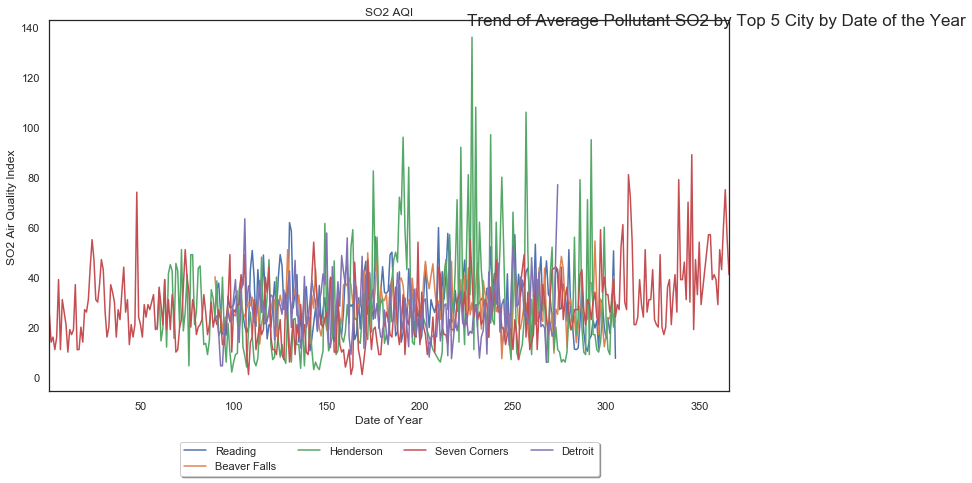

In [351]:
# Cities and SO2 data
city_dataSO2 = customx_df[["City", "Date of Year","SO2 AQI"]]\
    .groupby(['City', 'Date of Year']).mean().groupby(level="City")

plt.figure(figsize=(20,12))
for air2,plot in [('SO2 AQI',221)]:
        plt.subplot(plot)
        city_dataSO2_plot = city_dataSO2[air2]
        city_dataSO2_plotTop = city_dataSO2_plot.mean().nlargest(5).index
        for i in city_dataSO2_plotTop:
            plot1= city_dataSO2_plot.get_group(i).groupby(pd.Grouper(level='Date of Year'))\
            .mean().plot()
        plt.title(air2)
        plt.xlabel('Date of Year')
        plt.ylabel("SO2 Air Quality Index")
        plt.legend(city_dataSO2_plotTop, loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=4)

plt.tight_layout()
#plt.subplots_adjust()
plt.suptitle("Trend of Average Pollutant SO2 by Top 5 City by Date of the Year",fontsize=17)
#plt.savefig('Trend of Average Pollutant by Top 5 City.png')
plt.show()

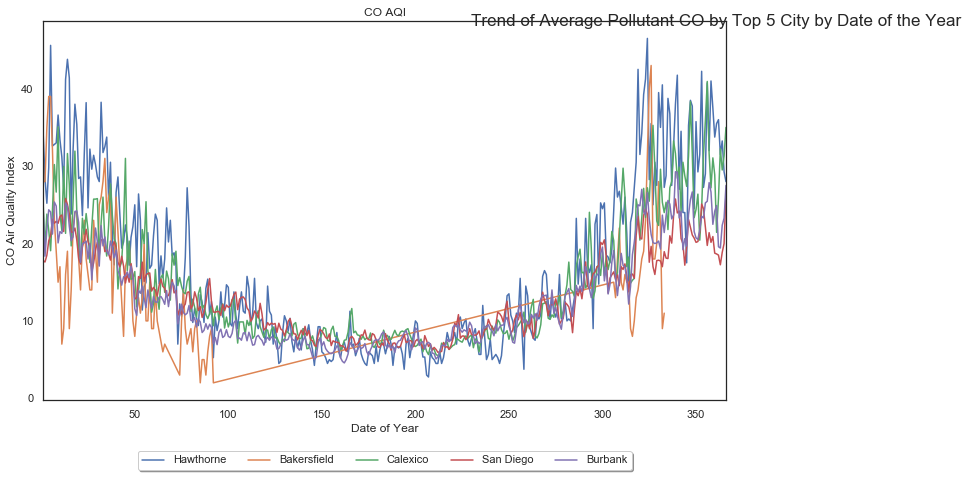

In [355]:
# Cities and CO data
city_dataCO = customx_df[["City", "Date of Year","CO AQI"]]\
    .groupby(['City', 'Date of Year']).mean().groupby(level="City")

plt.figure(figsize=(20,12))
for air3,plot in [('CO AQI',221)]:
        plt.subplot(plot)
        city_dataCO_plot = city_dataCO[air3]
        city_dataCO_plotTop = city_dataCO_plot.mean().nlargest(5).index
        for i in city_dataCO_plotTop:
            plot1= city_dataCO_plot.get_group(i).groupby(pd.Grouper(level='Date of Year'))\
            .mean().plot()
        plt.title(air3)
        plt.xlabel('Date of Year')
        plt.ylabel("CO Air Quality Index")
        plt.legend(city_dataCO_plotTop, loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
#plt.subplots_adjust()
plt.suptitle("Trend of Average Pollutant CO by Top 5 City by Date of the Year",fontsize=17)
#plt.savefig('Trend of Average Pollutant by Top 5 City.png')
plt.show()

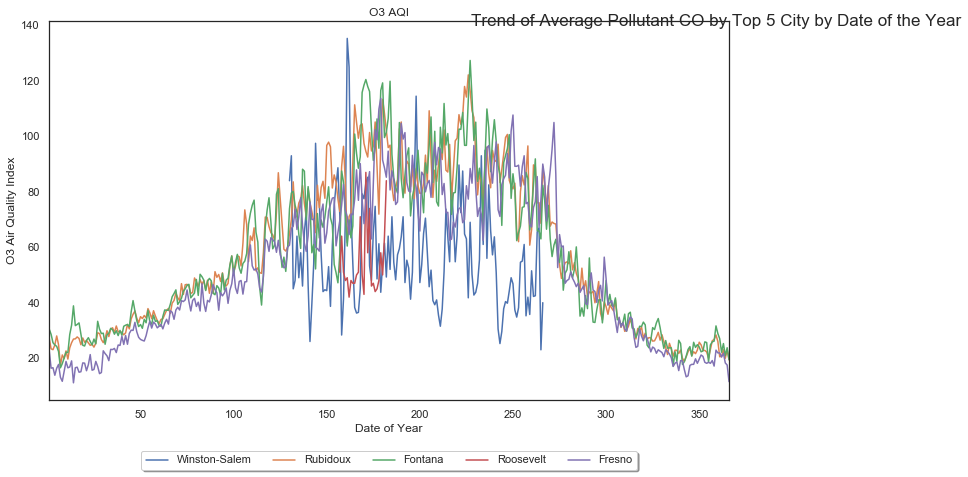

In [357]:
# Cities and O3 data
city_dataO3 = customx_df[["City", "Date of Year","O3 AQI"]]\
    .groupby(['City', 'Date of Year']).mean().groupby(level="City")

plt.figure(figsize=(20,12))
for air4,plot in [('O3 AQI',221)]:
        plt.subplot(plot)
        city_dataO3_plot = city_dataO3[air4]
        city_dataO3_plotTop = city_dataO3_plot.mean().nlargest(5).index
        for i in city_dataO3_plotTop:
            plot1= city_dataO3_plot.get_group(i).groupby(pd.Grouper(level='Date of Year'))\
            .mean().plot()
        plt.title(air4)
        plt.xlabel('Date of Year')
        plt.ylabel("O3 Air Quality Index")
        plt.legend(city_dataO3_plotTop, loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
#plt.subplots_adjust()
plt.suptitle("Trend of Average Pollutant CO by Top 5 City by Date of the Year",fontsize=17)
#plt.savefig('Trend of Average Pollutant by Top 5 City.png')
plt.show()

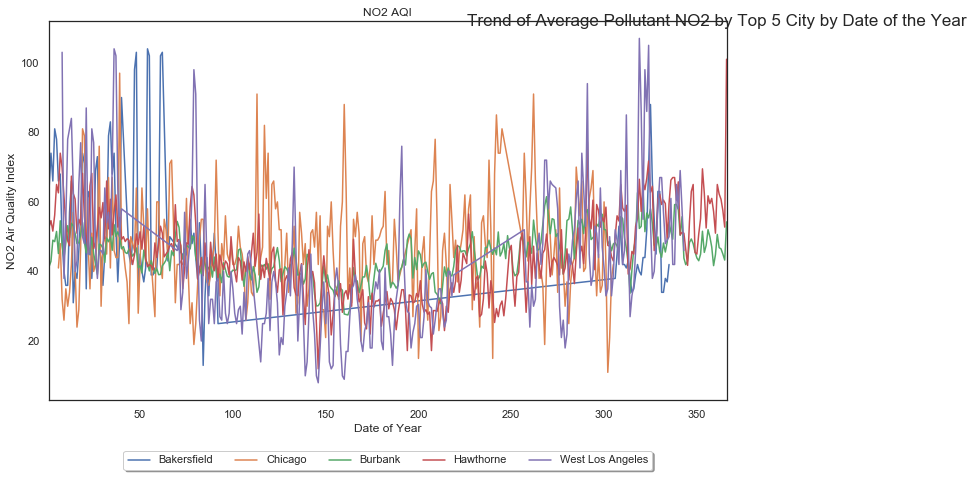

In [359]:
# Cities and NO2 data
city_dataNO2x = customx_df[["City", "Date of Year","NO2 AQI"]]\
    .groupby(['City', 'Date of Year']).mean().groupby(level="City")

plt.figure(figsize=(20,12))
for air5,plot in [('NO2 AQI',221)]:
        plt.subplot(plot)
        city_dataNO2x_plot = city_dataNO2x[air5]
        city_dataNO2x_plotTop = city_dataNO2_plot.mean().nlargest(5).index
        for i in city_dataNO2x_plotTop:
            plot1= city_dataNO2x_plot.get_group(i).groupby(pd.Grouper(level='Date of Year'))\
            .mean().plot()
        plt.title(air5)
        plt.xlabel('Date of Year')
        plt.ylabel("NO2 Air Quality Index")
        plt.legend(city_dataNO2x_plotTop, loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
#plt.subplots_adjust()
plt.suptitle("Trend of Average Pollutant NO2 by Top 5 City by Date of the Year",fontsize=17)
#plt.savefig('Trend of Average Pollutant by Top 5 City.png')
plt.show()

In [361]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [366]:
df['month'] = pd.DatetimeIndex(df['Date Local']).month

In [367]:
# Separating the Louisiana data 
la = df[df.State=='District Of Columbia'][["NO2 AQI","SO2 AQI","CO AQI","Date Local","year","month"
                   ]]
la.head()


,NO2 AQI,SO2 AQI,CO AQI,Date Local,year,month
39766,37,47.0,NaN,2000-01-01,2000,1
39767,37,47.0,41.0,2000-01-01,2000,1
39768,37,NaN,NaN,2000-01-01,2000,1
39769,37,NaN,41.0,2000-01-01,2000,1
39770,21,16.0,NaN,2000-01-02,2000,1


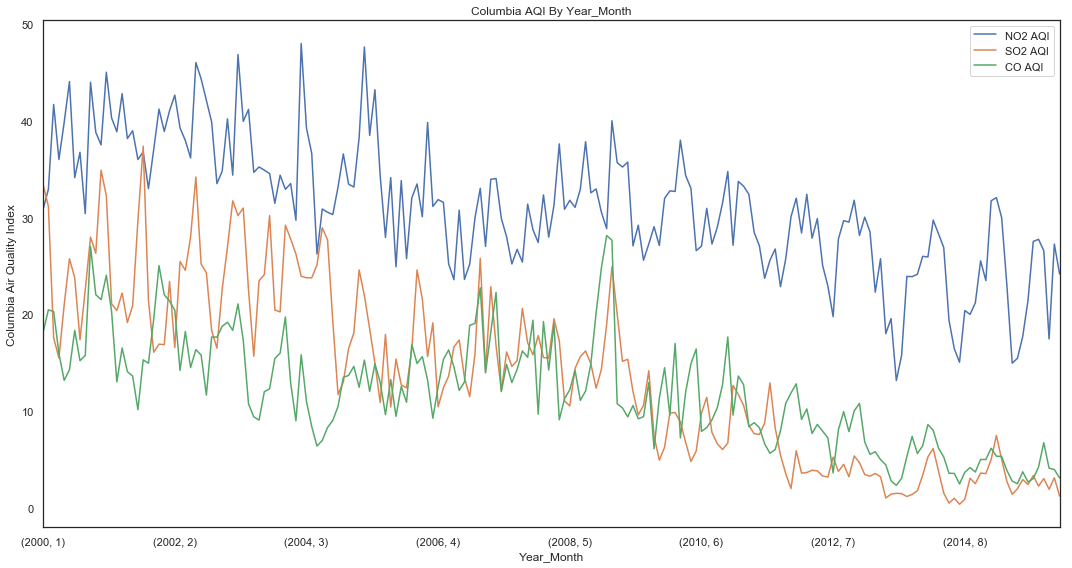

In [377]:
lamean = la.groupby(['year','month']).mean()
lamean.plot(figsize=(15,8))

plt.xlabel("Year_Month")
plt.ylabel("Columbia Air Quality Index")
plt.title("Columbia AQI By Year_Month")


plt.savefig("Columbia AQI By Year_Mont.png" , bbox_inches="tight")
plt.tight_layout()
plt.show()

In [368]:
wy = df[df.State=='Kansas'][["NO2 AQI","SO2 AQI","CO AQI","Date Local","year","month"
                   ]]
wy.head()

,NO2 AQI,SO2 AQI,CO AQI,Date Local,year,month
46130,8,6.0,NaN,2000-01-01,2000,1
46131,8,6.0,10.0,2000-01-01,2000,1
46132,8,NaN,NaN,2000-01-01,2000,1
46133,8,NaN,10.0,2000-01-01,2000,1
46134,6,4.0,NaN,2000-01-02,2000,1


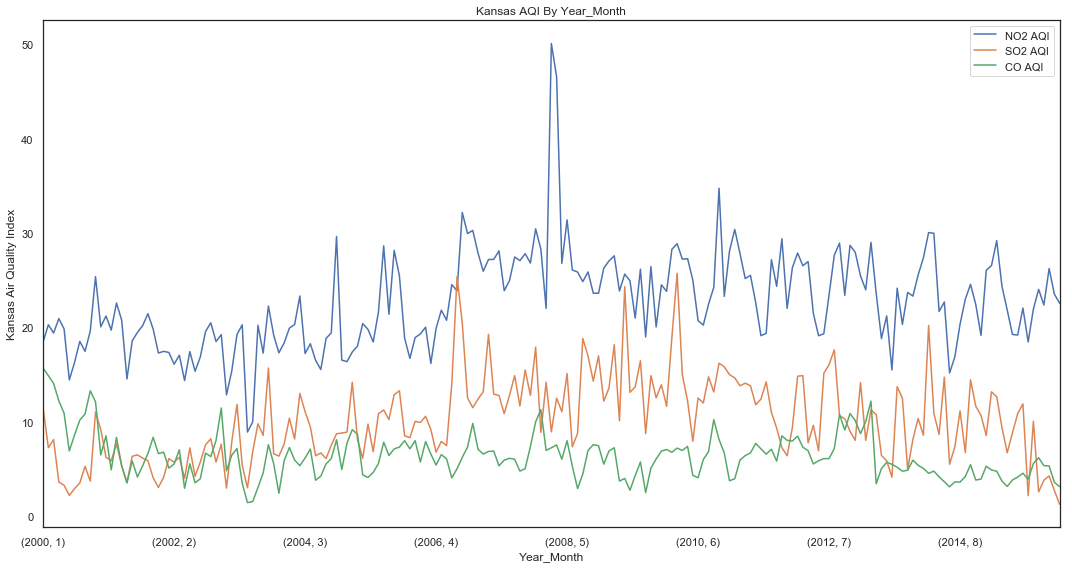

In [378]:
wymean = wy.groupby(['year','month']).mean()
wymean.plot(figsize=(15,8))

plt.xlabel("Year_Month")
plt.ylabel("Kansas Air Quality Index")
plt.title("Kansas AQI By Year_Month")


plt.savefig("Kansas AQI By Year_Mont.png" , bbox_inches="tight")
plt.tight_layout()
plt.show()

In [369]:
us = df[["NO2 AQI","SO2 AQI","CO AQI","O3 AQI","Date Local","year","month"
                   ]]
us.head()

,NO2 AQI,SO2 AQI,CO AQI,O3 AQI,Date Local,year,month
0,46,13.0,NaN,34,2000-01-01,2000,1
1,46,13.0,25.0,34,2000-01-01,2000,1
2,46,NaN,NaN,34,2000-01-01,2000,1
3,46,NaN,25.0,34,2000-01-01,2000,1
4,34,4.0,NaN,27,2000-01-02,2000,1


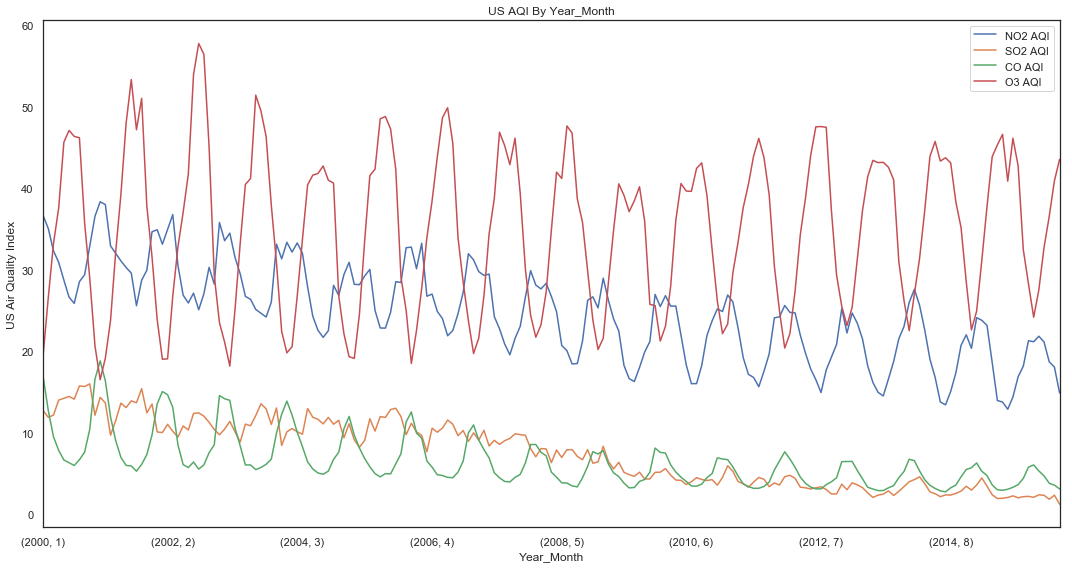

In [379]:
usmean = us.groupby(['year','month']).mean()
usmean.plot(figsize = (15,8))

plt.xlabel("Year_Month")
plt.ylabel("US Air Quality Index")
plt.title("US AQI By Year_Month")


plt.savefig("US AQI By Year_Mont.png" , bbox_inches="tight")
plt.tight_layout()
plt.show()


In [383]:
cal = df[df.State=='California'][["NO2 AQI","SO2 AQI","CO AQI" ,"O3 AQI","Date Local","year","month"
                   ]]
cal.head()

,NO2 AQI,SO2 AQI,CO AQI,O3 AQI,Date Local,year,month
3516,25,3.0,NaN,25,2000-01-01,2000,1
3517,25,3.0,9.0,25,2000-01-01,2000,1
3518,25,NaN,NaN,25,2000-01-01,2000,1
3519,25,NaN,9.0,25,2000-01-01,2000,1
3520,28,3.0,NaN,27,2000-01-02,2000,1


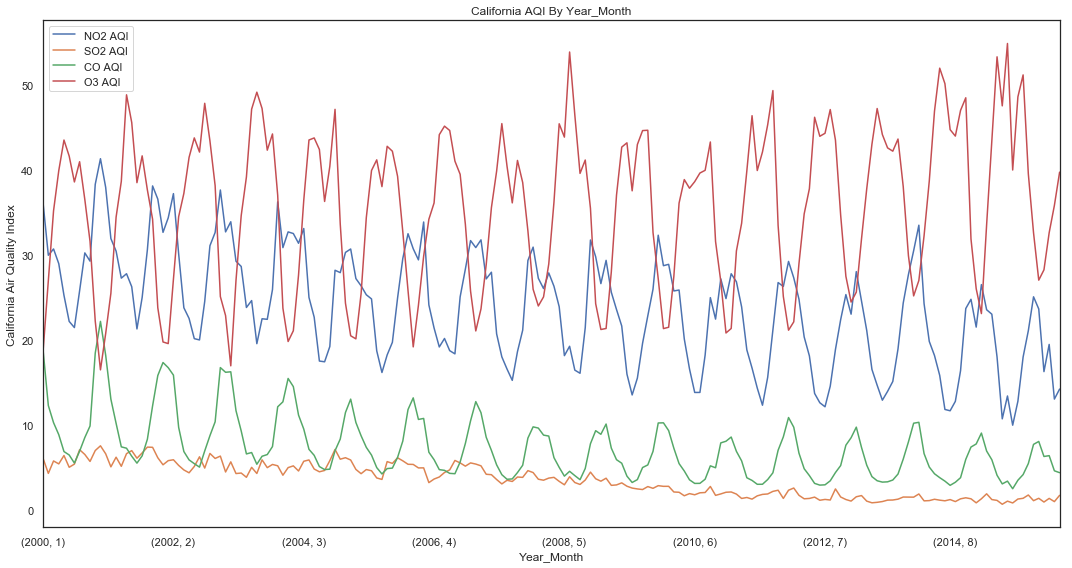

In [384]:
calmean = cal.groupby(['year','month']).mean()
calmean.plot(figsize=(15,8))

plt.xlabel("Year_Month")
plt.ylabel("California Air Quality Index")
plt.title("California AQI By Year_Month")


plt.savefig("California AQI By Year_Mont.png" , bbox_inches="tight")
plt.tight_layout()
plt.show()